<a href="https://colab.research.google.com/github/Johndola58/Johndola58/blob/main/John_Adetokunbo_MSc_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

# ***Splitting to 70 30 ***

In this example, we are tuning the following hyperparameters:

C: Inverse of regularization strength. Smaller values specify stronger regularization.
penalty: Used to specify the norm used in the penalization (l1 or l2).
class_weight: Weights associated with classes. If not given, all classes are supposed to have weight one. The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.
The GridSearchCV function will run the model with every combination of these hyperparameters and return the parameters that give the best performance.
Fitting 3 folds for each of 28 candidates, totalling 84 fits

In this example, we are tuning the following hyperparameters:

n_estimators: The number of trees in the forest.
max_depth: The maximum depth of the tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
class_weight: Weights associated with classes. If not given, all classes are supposed to have weight one. The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.
The GridSearchCV function will run the model with every combination of these hyperparameters and return the parameters that give the best performance.
Fitting 3 folds for each of 540 candidates, totalling 1620 fits

In [ ]:
!pip install keras-tuner


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [ ]:
# Check for missing data
missing_data = data.isnull().sum()
print(missing_data)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
missing_percentage = (missing_data / len(data)) * 100
print(missing_percentage)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


If there are 11 missing values in the 'TotalCharges' column and those missing values correspond to customers who did not churn, you can consider using imputation methods to fill in the missing values. Imputation is a technique used to estimate missing values based on the available data.

One common approach is to impute the missing values with the mean or median of the non-missing values in the column. This ensures that the imputed values are representative of the overall distribution of the data. Here's an example of how you can impute the missing values with the mean:Mean Imputation:

Calculate the mean of the non-missing values in the column: μ
Replace the missing values with the mean value.
Mathematical formula: X_imputed = μ

Median Imputation:

Calculate the median of the non-missing values in the column: Med
Replace the missing values with the median value.
Mathematical formula: X_imputed = Med

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
# Convert 'TotalCharges' to numeric with errors='coerce'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Create a mask to identify missing values
missing_mask = data['TotalCharges'].isna()

# Impute missing values with the mean of non-missing values
imputer = SimpleImputer(strategy='mean')
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])

# Verify that missing values have been imputed
imputed_values = data.loc[missing_mask, 'TotalCharges']

In [ ]:
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [ ]:
# Remove the 'SeniorCitizen' column from the DataFrame
data_without_seniorcitizen = data.drop(columns=['SeniorCitizen'])

# Apply the describe and styling code
summary = data_without_seniorcitizen.describe().T.style.set_properties(
    **{'background-color': '#E9F6E2', 'color': 'black', 'border-color': '#8b8c8c'}
).set_caption("Descriptive Statistical Analysis on Numerical Features")

# Display the summary in a Jupyter Notebook (optional, if you're working in that environment)
summary


In [ ]:
# To export to Excel
summary.to_excel("summary.xlsx")

In [ ]:
# To export to HTML
summary.to_html("summary.html")

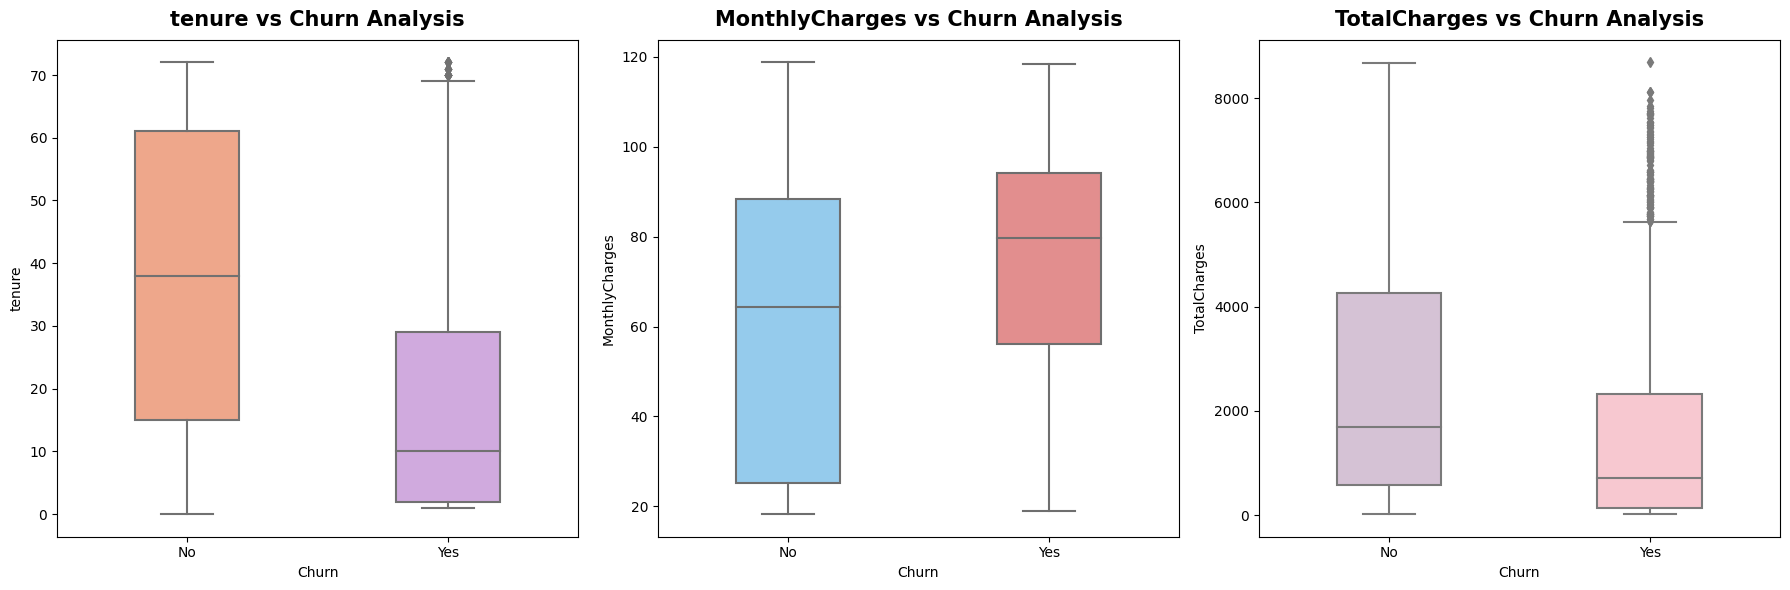

In [ ]:
def numerical_plot(df):
    plt.figure(figsize=(18, 6)) # Adjust the overall figure size

    # Tenure
    plt.subplot(1, 3, 1)
    sns.boxplot(x="Churn", y="tenure", data=df, palette=["#FFA07A","#D4A1E7"], width=0.4)
    plt.title("tenure vs Churn Analysis", fontweight="black", size=15, pad=10)
    plt.subplot(2, 1, 2)
        sns.histplot(x=column, kde=True, hue="Churn", data=df, palette="Set2", binwidth=5)  # You can adjust bin width if needed
        skew = df[column].skew()
        plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}", fontweight="black", size=15, pad=10)
        plt.tight_layout()
        plt.show()

    # MonthlyCharges
    plt.subplot(1, 3, 2)
    sns.boxplot(x="Churn", y="MonthlyCharges", data=data, palette=["#87CEFA","#F08080"], width=0.4)
    plt.title("MonthlyCharges vs Churn Analysis", fontweight="black", size=15, pad=10)

    # TotalCharges
    plt.subplot(1, 3, 3)
    sns.boxplot(x="Churn", y="TotalCharges", data=df, palette=["#D8BFD8","#FFC0CB"], width=0.4)
    plt.title("TotalCharges vs Churn Analysis", fontweight="black", size=15, pad=10)

    plt.tight_layout()
    plt.show()

numerical_plot(data)




In [ ]:
def numerical_plot(data):
    plt.figure(figsize=(18, 12)) # Adjust the overall figure size

    columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
    palettes_box = ["#FFA07A","#D4A1E7","#87CEFA"]
    palettes_hist = ["Set2", "Pastel1", "Set3"]

    for idx, column in enumerate(columns):
        plt.subplot(3, 2, idx * 2 + 1)
        sns.boxplot(x="Churn", y=column, data=data, palette=[palettes_box[idx]], width=0.4)
        plt.title(f"{column.title()} vs Churn Analysis", fontweight="bold", size=15, pad=10)
        plt.xticks(fontsize=12, fontweight="bold")
        plt.yticks(fontsize=12, fontweight="bold")

        plt.subplot(3, 2, idx * 2 + 2)
        sns.histplot(x=column, kde=True, hue="Churn", data=data, palette=palettes_hist[idx], binwidth=5) # You can adjust bin width if needed
        skew = data[column].skew()
        plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}", fontweight="bold", size=15, pad=10)
        plt.xticks(fontsize=12, fontweight="bold")
        plt.yticks(fontsize=12, fontweight="bold")

    plt.tight_layout()
    plt.show()

numerical_plot(data)



In [ ]:
plt.figure(figsize=(13.7,6))
z = data["Churn"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Churn Distributions", fontweight="black", size=25, pad=15)
for index, value in enumerate(z.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black")

plt.tight_layout()
plt.show()


In [ ]:
def numerical_plot(column):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x="Churn", y=column, data=data, palette=["#FFA07A","#D4A1E7"])
    plt.title(f"{column.title()} vs Churn Analysis", fontweight="black", size=25, pad=10)

    plt.subplot(2,1,2)
    sns.histplot(x=column, kde=True, hue="Churn", data=data, palette="Set2")
    skew = data[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}", fontweight="black", size=20, pad=10)
    plt.tight_layout()
    plt.show()

numerical_plot("tenure")


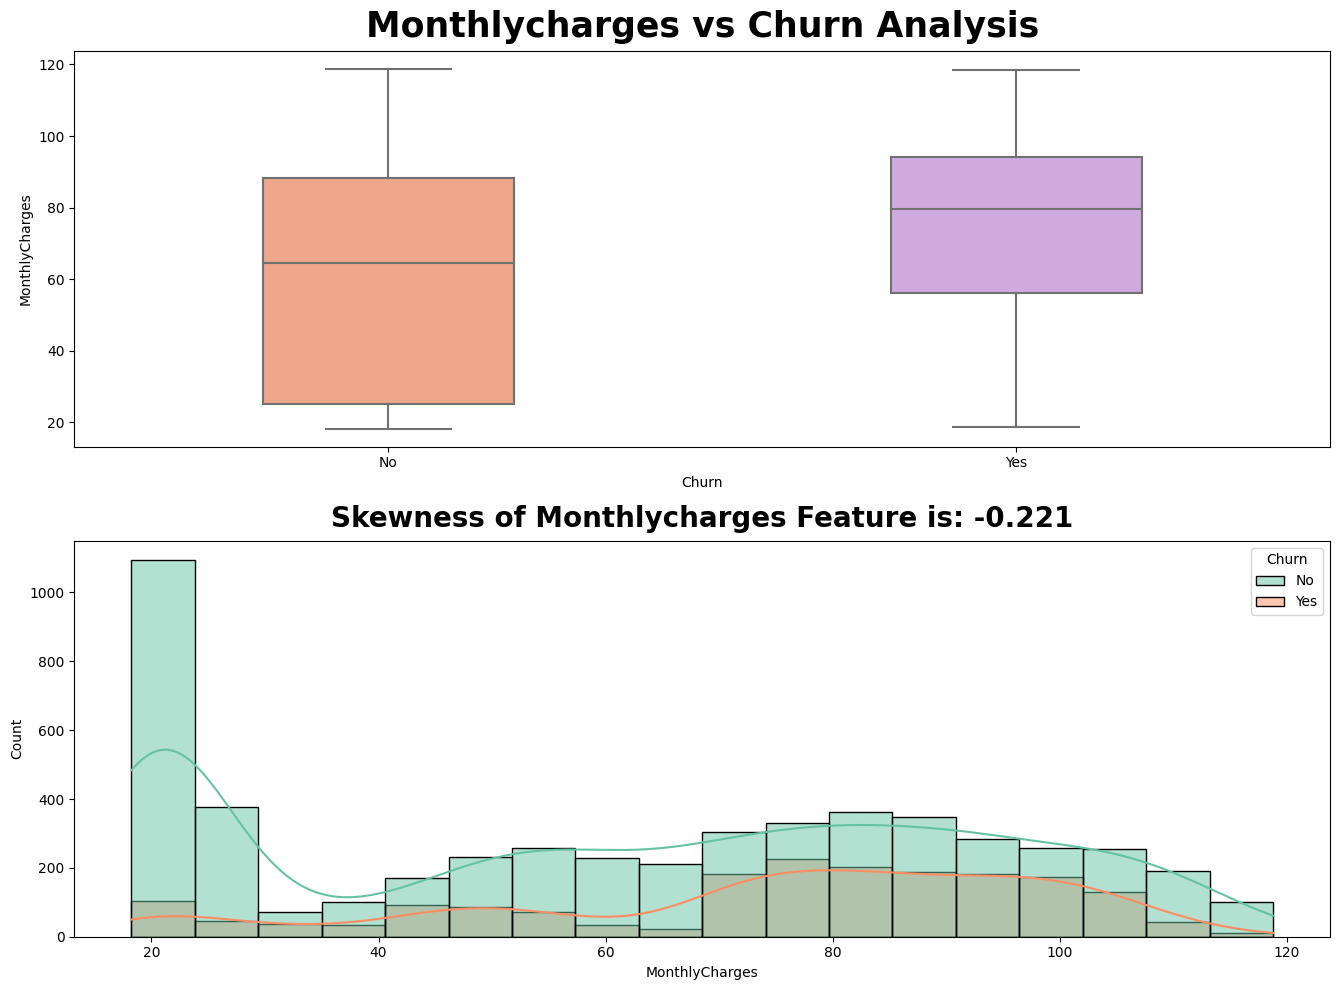

In [ ]:
def numerical_plot(column):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x="Churn", y=column, data=data, palette=["#FFA07A","#D4A1E7"], width=0.4) # Reduced width here)
    plt.title(f"{column.title()} vs Churn Analysis", fontweight="black", size=25, pad=10)

    plt.subplot(2,1,2)
    sns.histplot(x=column, kde=True, hue="Churn", data=data, palette="Set2")
    skew = data[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}", fontweight="black", size=20, pad=10)
    plt.tight_layout()
    plt.show()

numerical_plot("MonthlyCharges")

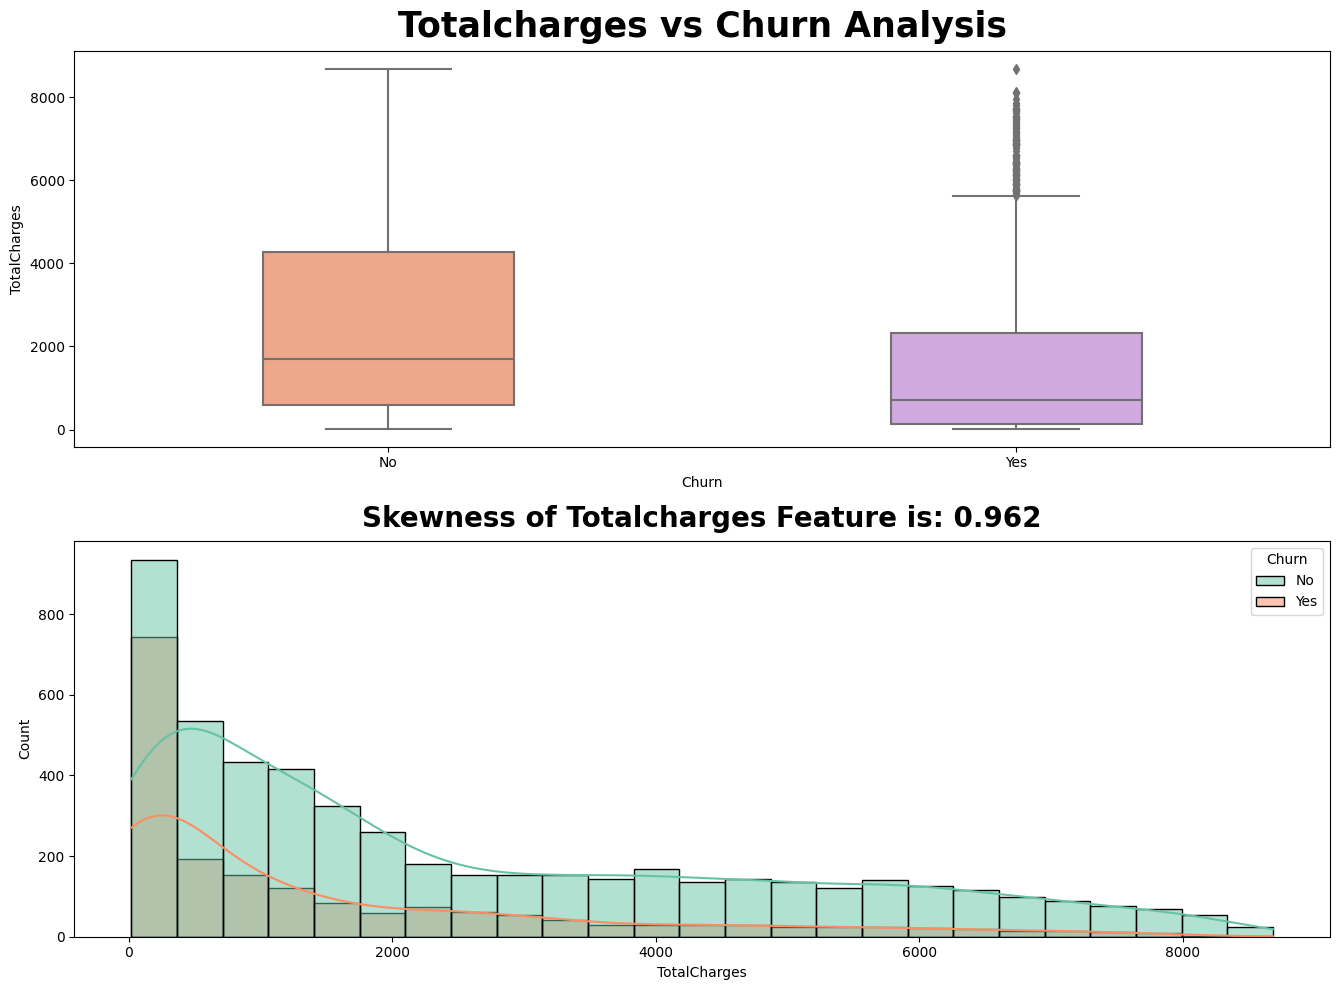

In [ ]:
def numerical_plot(column):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x="Churn", y=column, data=data, palette=["#FFA07A","#D4A1E7"], width=0.4) # Reduced width here)
    plt.title(f"{column.title()} vs Churn Analysis", fontweight="black", size=25, pad=10)

    plt.subplot(2,1,2)
    sns.histplot(x=column, kde=True, hue="Churn", data=data, palette="Set2")
    skew = data[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}", fontweight="black", size=20, pad=10)
    plt.tight_layout()
    plt.show()

numerical_plot("TotalCharges")

In [ ]:
def numerical_plot(column):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x="Churn", y=column, data=data, palette=["#FFA07A","#D4A1E7"], width=0.4) # Reduced width here
    plt.title(f"{column.title()} vs Churn Analysis", fontweight="black", size=25, pad=10)

    plt.subplot(2,1,2)
    sns.histplot(x=column, kde=True, hue="Churn", data=data, palette="Set2", binwidth=3) # Reduced bin width here
    skew = data[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}", fontweight="black", size=20, pad=10)
    plt.tight_layout()
    plt.show()

numerical_plot("tenure")


<ipython-input-37-ccd27e8525f6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_without_seniorcitizen.corr()


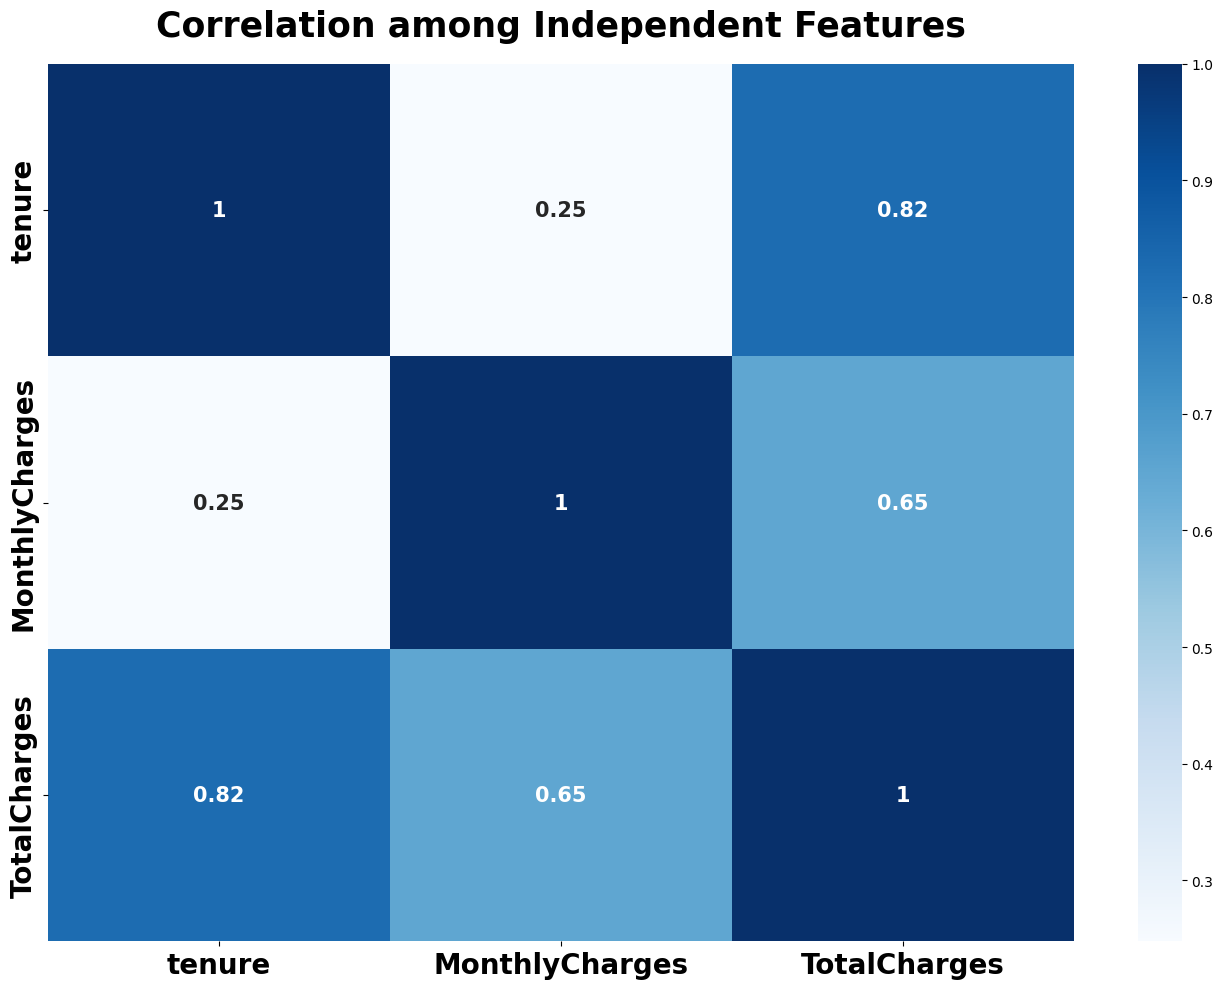

In [ ]:
# Remove the 'SeniorCitizen' column from the DataFrame
data_without_seniorcitizen = data.drop(columns=['SeniorCitizen'])

# Compute the correlation matrix for the remaining columns
corr = data_without_seniorcitizen.corr()

# Create the heatmap
plt.figure(figsize=(13.5,10))
sns.heatmap(corr, fmt=".2g", annot=True, cmap='Blues', annot_kws={'size': 15, 'weight': 'bold'})  # Using 'Blues' colormap and bold, large annotations
plt.title("Correlation among Independent Features", fontweight="black", size=25, pad=20)
# Set the size and weight of the x and y axis labels
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Remove the 'SeniorCitizen' column from the DataFrame
data_without_seniorcitizen = data.drop(columns=['SeniorCitizen', 'TotalCharges'])  # Removed 'TotalCharges'

# Compute the correlation matrix for the remaining columns
corr = data_without_seniorcitizen.corr()

# Create the heatmap
plt.figure(figsize=(13.5,10))
sns.heatmap(corr, fmt=".2g", annot=True, cmap='Greens', annot_kws={'size': 15, 'weight': 'bold'})  # Using 'Greens' colormap and bold, large annotations
plt.title("Correlation among Independent Features without Multicollinearity", fontweight="black", size=25, pad=20)

# Set the size and weight of the x and y axis labels
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()



<ipython-input-36-4440c4193a01>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_without_seniorcitizen.corr()


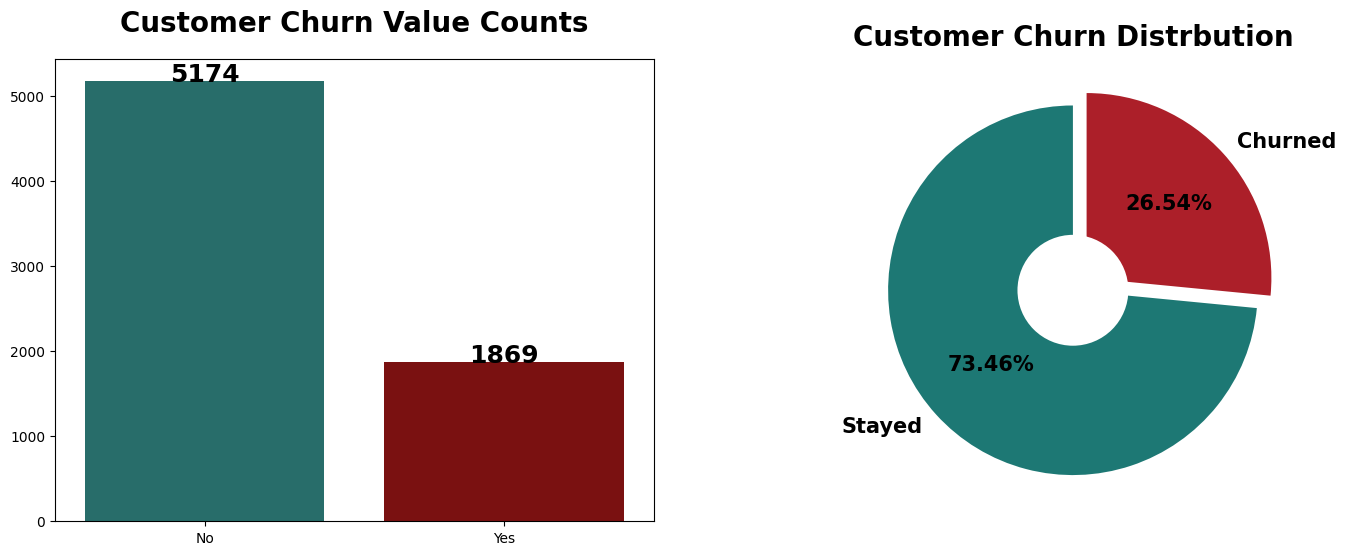

In [ ]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
Churn_counts = data["Churn"].value_counts()
sns.barplot(x=Churn_counts.index, y=Churn_counts.values,palette=["#1d7874","#8B0000"])
plt.title("Customer Churn Value Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(Churn_counts.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

plt.subplot(1,2,2)
plt.pie(Churn_counts, labels=["Stayed","Churned"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Customer Churn Distrbution" ,fontweight="black",size=20,pad=10)
plt.show()

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


<ipython-input-6-fd67c89d9ace>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['MonthlyCharges'], shade=True, color='purple')


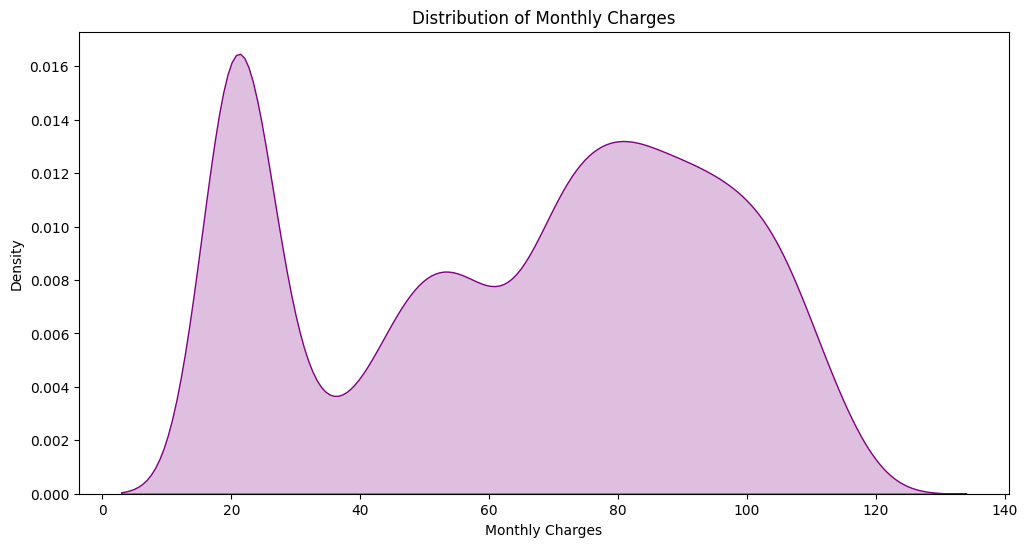

<ipython-input-6-fd67c89d9ace>:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['TotalCharges'], shade=True, color='purple')


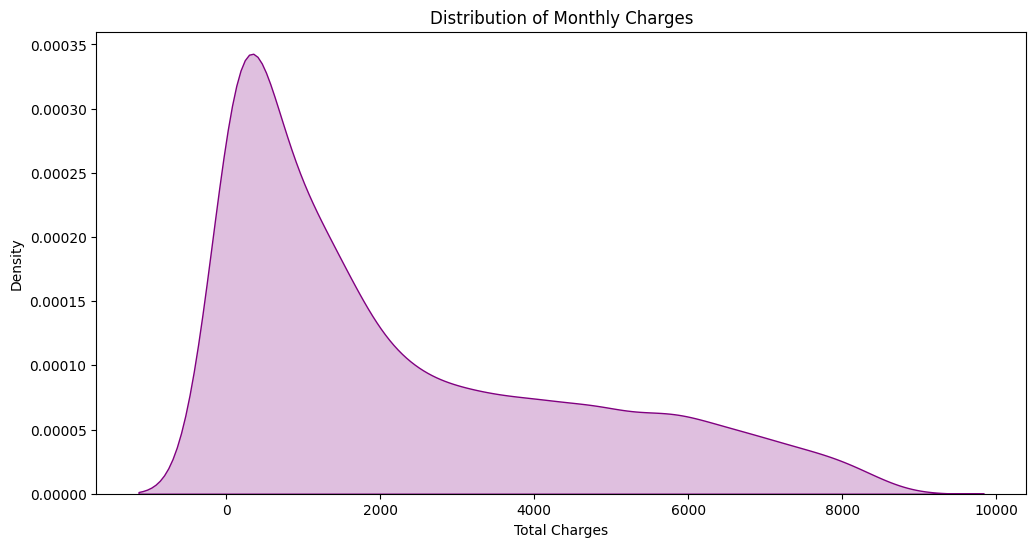

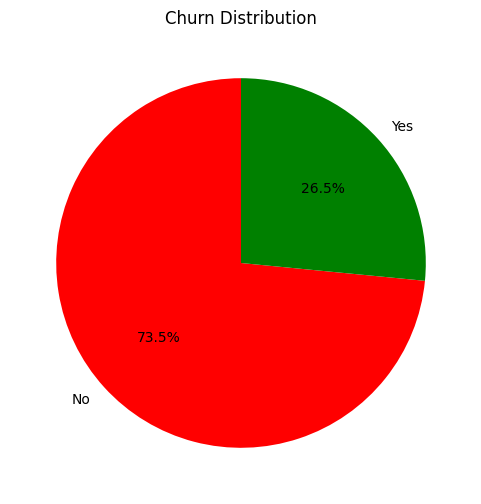

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Summary of statistics
summary = data.describe()
print(summary)

# Distribution plots
plt.figure(figsize=(12, 6))
sns.histplot(data['tenure'], kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()



plt.figure(figsize=(12, 6))
sns.kdeplot(data['MonthlyCharges'], shade=True, color='purple')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data['TotalCharges'], shade=True, color='purple')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()


# Pie chart of churn distribution
churn_counts = data['Churn'].value_counts()
labels = churn_counts.index
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, colors=['red', 'green'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

# Additional visualizations can be added based on your specific requirements



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

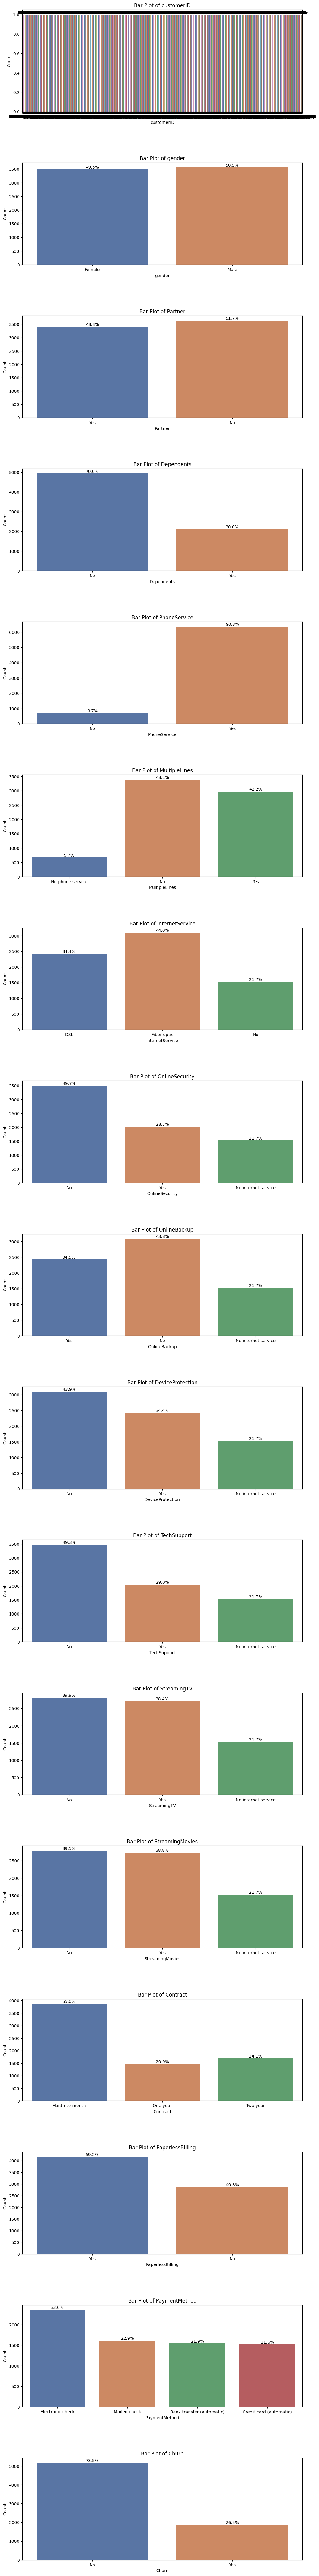

In [ ]:
# Get the list of categorical columns
categorical_columns = data.select_dtypes(include='object').columns.tolist()

# Set the color palette
colors = sns.color_palette('deep', n_colors=len(categorical_columns))

# Create subplots for each categorical variable
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 5 * len(categorical_columns)))
fig.tight_layout()

# Iterate through each categorical variable and create a bar plot
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=data, x=col, ax=ax, palette=colors)
    ax.set_title(f'Bar Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Add percentage labels to the bars
    total = float(len(data[col]))
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Add space between each subplot
plt.subplots_adjust(hspace=0.5)

plt.show()



<ipython-input-8-60f7e3458310>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


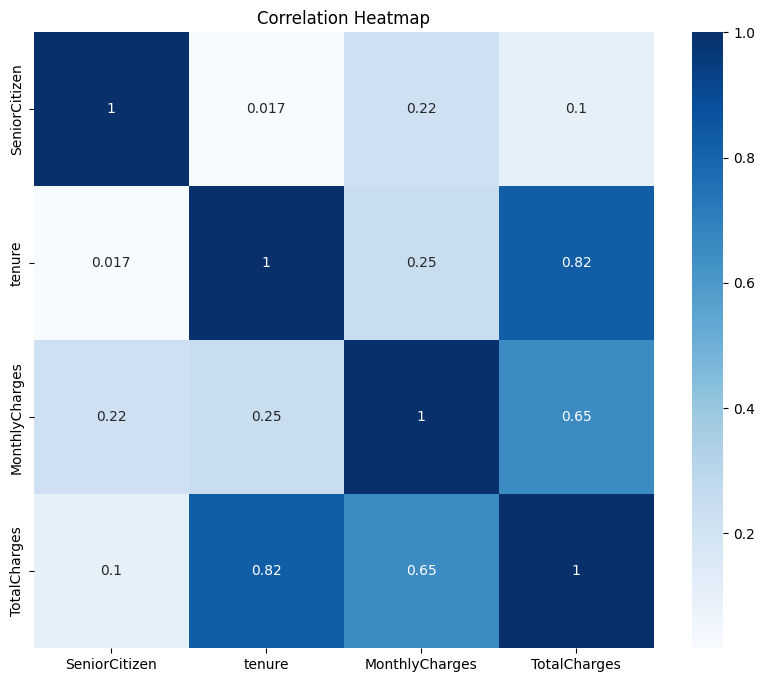

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, cmap='Blues', annot=True)
plt.title('Correlation Heatmap')
plt.show()

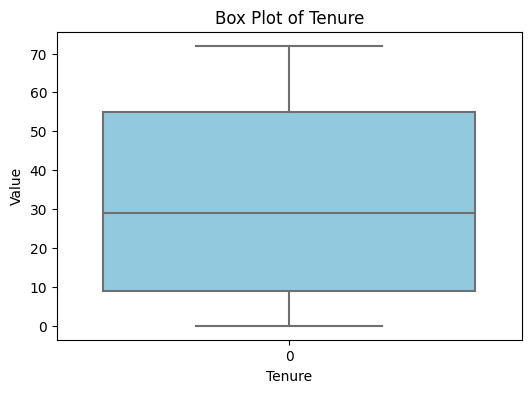

In [ ]:
# Create a box plot for 'tenure' with different colors
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['tenure'], color='skyblue')
plt.title('Box Plot of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Value')
plt.show()

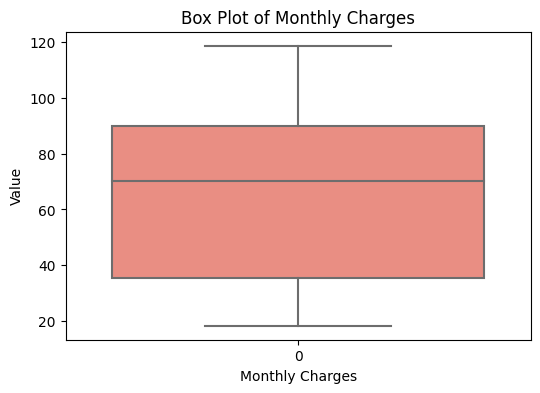

In [ ]:
# Create a box plot for 'MonthlyCharges' with different colors
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['MonthlyCharges'], color='salmon')
plt.title('Box Plot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Value')
plt.show()

In [ ]:
# Create a box plot for 'TotalCharges' with different colors
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['TotalCharges'], color='lightgreen')
plt.title('Box Plot of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Value')
plt.show()

In [ ]:
# Convert 'Churn' column to binary
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# Drop 'customerID'
data = data.drop('customerID', axis=1)

# Convert 'Churn' to binary
binarizer = LabelBinarizer()
data['Churn'] = binarizer.fit_transform(data['Churn'])

# Separate the target variable
y = data['Churn']
X = data.drop('Churn', axis=1)

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
X

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0                 Yes           Electronic check           29.85         29.85  
1                  No               Mailed check           56.95       1889.50  
2                 Yes               Mailed check           53.85        108.15  
3                  No  Bank transfer (automatic)           42.30       1840.75  
4                 Yes           Electronic check           70.70        151.65  
...               ...                        ...             ...           ...  
7038              Yes               Mailed check           84.80       1990.50  
7039              Yes    Credit card (automatic)          103.20       7362.90  
7040              Yes           Electronic check           29.60        346.45  
7041              Yes               Mailed check           74.40        306.60  
7042              Yes  Bank transfer (automatic)          105.65       6844.50  

[7043 rows x 19 columns]

In [ ]:

# Separate the target variable
y = data['Churn']
X = data.drop(['Churn', 'TotalCharges'], axis=1)

# One-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
0                 0       1           29.85            0            1   
1                 0      34           56.95            1            0   
2                 0       2           53.85            1            0   
3                 0      45           42.30            1            0   
4                 0       2           70.70            0            0   
...             ...     ...             ...          ...          ...   
7038              0      24           84.80            1            1   
7039              0      72          103.20            0            1   
7040              0      11           29.60            0            1   
7041              1       4           74.40            1            1   
7042              0      66          105.65            1            0   

      Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0                  0                 0                               1   
1                  0                 1                               0   
2                  0                 1                               0   
3                  0                 0                               1   
4                  0                 1                               0   
...              ...               ...                             ...   
7038               1                 1                               0   
7039               1                 1                               0   
7040               1                 0                               1   
7041               0                 1                               0   
7042               0                 1                               0   

      MultipleLines_Yes  InternetService_Fiber optic  ...  \
0                     0                            0  ...   
1                     0                            0  ...   
2                     0                            0  ...   
3                     0                            0  ...   
4                     0                            1  ...   
...                 ...                          ...  ...   
7038                  1                            0  ...   
7039                  1                            1  ...   
7040                  0                            0  ...   
7041                  1                            1  ...   
7042                  0                            1  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
0                                   0                0   
1                                   0                0   
2                                   0                0   
3                                   0                0   
4                                   0                0   
...                               ...              ...   
7038                                0                1   
7039                                0                1   
7040                                0                0   
7041                                0                0   
7042                                0                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   
4                                       0                    0   
...                                   ...                  ...   
7038                                    0                    1   
7039                                    0                    1   
7040                                    0                    0   
7041                                    0                    0   
7042                                    0                    1   

      Contract_On

## **Basic Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Train logistic regression with class weights
model = LogisticRegression(class_weight=dict(enumerate(class_weights)))
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
confusion = confusion_matrix(y_val, y_val_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

from sklearn.metrics import classification_report

# Make predictions on the validation set
y_val_pred = model.predict(X_val)


# Classification report
classification_report = classification_report(y_val, y_val_pred)

# Print the evaluation metrics and classification report

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)






Accuracy: 0.7445600756859035
F1 Score: 0.6131805157593124
Precision: 0.513189448441247
Recall: 0.7615658362989324
AUC: 0.8272943647503395
Confusion Matrix:
 [[573 203]
 [ 67 214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       776
           1       0.51      0.76      0.61       281

    accuracy                           0.74      1057
   macro avg       0.70      0.75      0.71      1057
weighted avg       0.79      0.74      0.76      1057



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


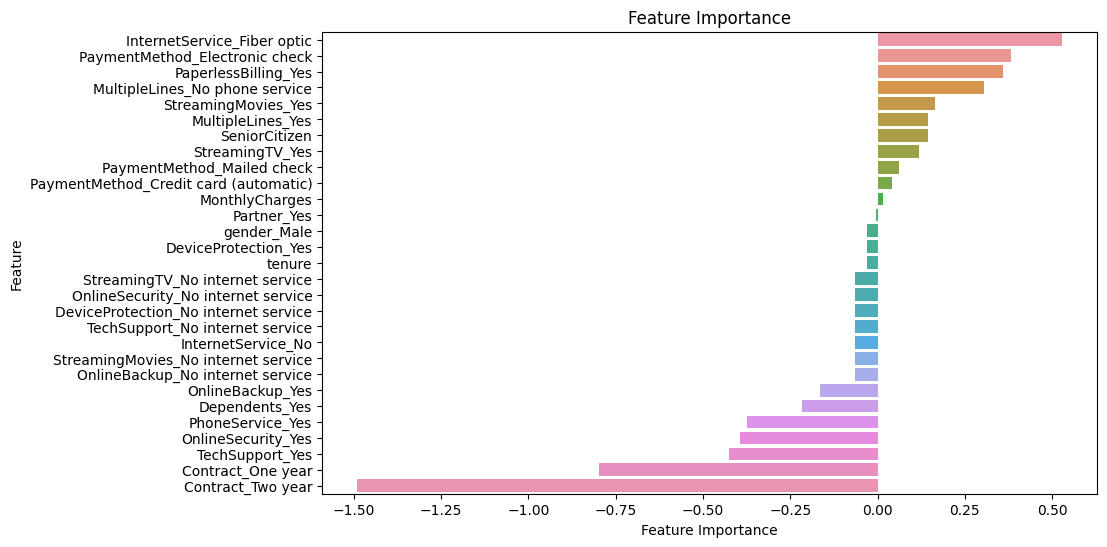

In [ ]:
# Calculate feature importances
feature_importances = model.coef_[0]

# Feature Importance Visualization
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# ... (rest of the code)






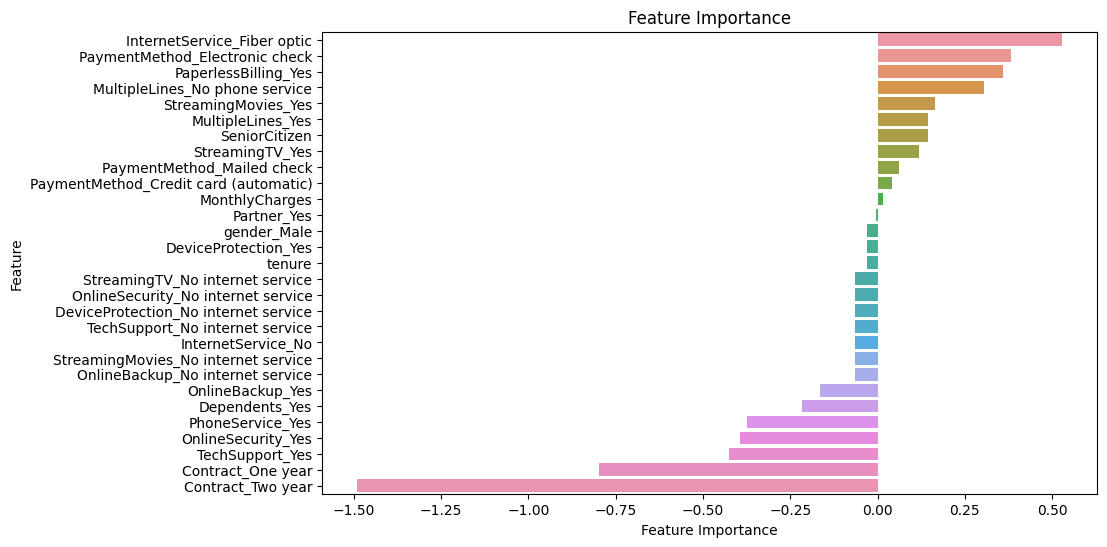

NameError: ignored

In [ ]:
# Feature Importance Visualization
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Confusion Matrix Visualization for Class 0
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Class 0')
plt.show()

# AUC-ROC Curve for Class 0
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 0')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Visualization for Class 1
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Class 1')
plt.show()

# AUC-


## **Basic Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight


# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Train Random Forest with class weights
model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
confusion = confusion_matrix(y_val, y_val_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)
print("Confusion Matrix:\n", confusion)

from sklearn.metrics import classification_report

# Make predictions on the validation set
y_val_pred = model.predict(X_val)


# Classification report
classification_report = classification_report(y_val, y_val_pred)

# Print the evaluation metrics and classification report

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)



Accuracy: 0.7899716177861873
F1 Score: 0.5432098765432098
Precision: 0.6439024390243903
Recall: 0.4697508896797153
AUC: 0.8196243166892907
Confusion Matrix:
 [[703  73]
 [149 132]]
Confusion Matrix:
 [[703  73]
 [149 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86       776
           1       0.64      0.47      0.54       281

    accuracy                           0.79      1057
   macro avg       0.73      0.69      0.70      1057
weighted avg       0.78      0.79      0.78      1057



## ***Support Vector Machine***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight


# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Train Support Vector Machine with class weights
model = SVC(class_weight=dict(enumerate(class_weights)))
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.decision_function(X_val))
confusion = confusion_matrix(y_val, y_val_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)
print("Confusion Matrix:\n", confusion)

from sklearn.metrics import classification_report

# Make predictions on the validation set
y_val_pred = model.predict(X_val)


# Classification report
classification_report = classification_report(y_val, y_val_pred)

# Print the evaluation metrics and classification report

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)


Accuracy: 0.6669820245979187
F1 Score: 0.4777448071216617
Precision: 0.40966921119592875
Recall: 0.5729537366548043
AUC: 0.6960918296217485
Confusion Matrix:
 [[544 232]
 [120 161]]
Confusion Matrix:
 [[544 232]
 [120 161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76       776
           1       0.41      0.57      0.48       281

    accuracy                           0.67      1057
   macro avg       0.61      0.64      0.62      1057
weighted avg       0.71      0.67      0.68      1057



## ***XGBoost classifie***

# New section

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight


# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Train XGBoost with class weights
model = xgb.XGBClassifier(scale_pos_weight=class_weights[1])
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
confusion = confusion_matrix(y_val, y_val_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)
print("Confusion Matrix:\n", confusion)

from sklearn.metrics import classification_report

# Make predictions on the validation set
y_val_pred = model.predict(X_val)


# Classification report
classification_report = classification_report(y_val, y_val_pred)

# Print the evaluation metrics and classification report

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)


Accuracy: 0.7644276253547777
F1 Score: 0.575809199318569
Precision: 0.5522875816993464
Recall: 0.6014234875444839
AUC: 0.8093242102946033
Confusion Matrix:
 [[639 137]
 [112 169]]
Confusion Matrix:
 [[639 137]
 [112 169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       776
           1       0.55      0.60      0.58       281

    accuracy                           0.76      1057
   macro avg       0.70      0.71      0.71      1057
weighted avg       0.77      0.76      0.77      1057



## ***Feedforward ANN***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight


# Split the data into train, validation, and test sets (70-15-15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Build the model
model = keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with sample weights
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, sample_weight=sample_weights, validation_data=(X_val_scaled, y_val))

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Classification report
classification_report = classification_report(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)


Epoch 1/50
78/78 [==============================] - 4s 9ms/step - loss: 0.5593 - accuracy: 0.6852 - val_loss: 0.5171 - val_accuracy: 0.7282
Epoch 2/50
78/78 [==============================] - 0s 6ms/step - loss: 0.4964 - accuracy: 0.7432 - val_loss: 0.5093 - val_accuracy: 0.7343
Epoch 3/50
78/78 [==============================] - 0s 6ms/step - loss: 0.4821 - accuracy: 0.7428 - val_loss: 0.4863 - val_accuracy: 0.7448
Epoch 4/50
78/78 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.7525 - val_loss: 0.5464 - val_accuracy: 0.7144
Epoch 5/50
78/78 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.7460 - val_loss: 0.5104 - val_accuracy: 0.7274
Epoch 6/50
78/78 [==============================] - 1s 8ms/step - loss: 0.4621 - accuracy: 0.7680 - val_loss: 0.5367 - val_accuracy: 0.7262
Epoch 7/50
78/78 [==============================] - 0s 6ms/step - loss: 0.4515 - accuracy: 0.7728 - val_loss: 0.5087 - val_accuracy: 0.7290
Epoch 8/50
78/78 [==

## **Hyperparameter Tunning LR**

In this code, the hyperparameters C and penalty are tuned using the GridSearchCV function with 5-fold cross-validation. The parameter grid specifies the different values to try for each hyperparameter. The best model with the optimal hyperparameters is then used to make predictions on the validation set, and the evaluation metrics are calculated. Finally, the best hyperparameters, evaluation metrics, and classification report are printed.

You can modify the parameter grid to include additional hyperparameters or try different values based on your specific needs.

The param_grid is a dictionary object used in the process of hyperparameter tuning with grid search. It specifies the hyperparameters and their corresponding values that will be explored during the grid search.

In this particular example, the param_grid consists of two hyperparameters:

'C': This hyperparameter represents the inverse of the regularization strength. It controls the amount of regularization applied to the logistic regression model. Smaller values of C result in stronger regularization, while larger values reduce the regularization effect. The values [0.01, 0.1, 1.0, 10.0] are provided to explore a range of regularization strengths.

'penalty': This hyperparameter determines the type of regularization used in logistic regression. It can take two values: 'l1' and 'l2'. 'l1' refers to L1 regularization (also known as Lasso regularization), which encourages sparsity in the model by setting some feature coefficients to zero. 'l2' refers to L2 regularization (also known as Ridge regularization), which shrinks the magnitude of the feature coefficients without enforcing sparsity.

By specifying different values for 'C' and 'penalty', the grid search algorithm will systematically evaluate the performance of logistic regression models trained with various combinations of these hyperparameters. This allows the algorithm to identify the combination that yields the best performance based on the provided scoring metric (in this case, accuracy).

In summary, the param_grid defines a set of hyperparameters to be explored during the grid search process, allowing for the selection of the best combination of hyperparameters for logistic regression.

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

# Create the logistic regression model
logreg = LogisticRegression(class_weight=dict(enumerate(class_weights)))

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])
confusion = confusion_matrix(y_val, y_val_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Generate the classification report
classification_report_str = classification_report(y_val, y_val_pred)

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.7530747398297067
F1 Score: 0.6233766233766234
Precision: 0.5242718446601942
Recall: 0.7686832740213523
AUC: 0.8291723227060938
Confusion Matrix:
 [[580 196]
 [ 65 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       776
           1       0.52      0.77      0.62       281

    accuracy                           0.75      1057
   macro avg       0.71      0.76      0.72      1057
weighted avg       0.80      0.75      0.77      1057



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

 we performed hyperparameter tuning for the Random Forest model using GridSearchCV. The parameter grid param_grid defined different values to be tested for n_estimators, max_depth, min_samples_split, and min_samples_leaf. After running the grid search, we obtained the best hyperparameters (best_params) and used the corresponding best model to make predictions on the validation set. We calculated various evaluation metrics and printed them, along with the confusion matrix and classification report.

To provide a descriptive report, we specifically focused on the tuned parameter n_estimators. We

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
rf = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])
confusion = confusion_matrix(y_val, y_val_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Classification report
classification_report = classification_report(y_val, y_val_pred)

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)

# Report on the tuned parameter
print("Tuned Parameter: n_estimators")
print("Description: The number of trees in the random forest ensemble.")
print("Tuned Value:", best_params['n_estimators'])

# Add descriptions for other tuned parameters if necessary
# ...

# Add a summary or conclusion about the impact of the tuned parameter on the model performance
# ...



Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7975402081362346
F1 Score: 0.5962264150943395
Precision: 0.6345381526104418
Recall: 0.5622775800711743
AUC: 0.8270971677000404
Confusion Matrix:
 [[685  91]
 [123 158]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       776
           1       0.63      0.56      0.60       281

    accuracy                           0.80      1057
   macro avg       0.74      0.72      0.73      1057
weighted avg       0.79      0.80      0.79      1057

Tuned Parameter: n_estimators
Description: The number of trees in the random forest ensemble.
Tuned Value: 200


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
rf = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])
confusion = confusion_matrix(y_val, y_val_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Get the feature importances
feature_importances = best_model.feature_importances_




Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7975402081362346
F1 Score: 0.5977443609022557
Precision: 0.6334661354581673
Recall: 0.5658362989323843
AUC: 0.82422634552592


<ipython-input-49-6737ddfc2e8d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0_importance_df = importance_df[y_val.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
<ipython-input-49-6737ddfc2e8d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1_importance_df = importance_df[y_val.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)


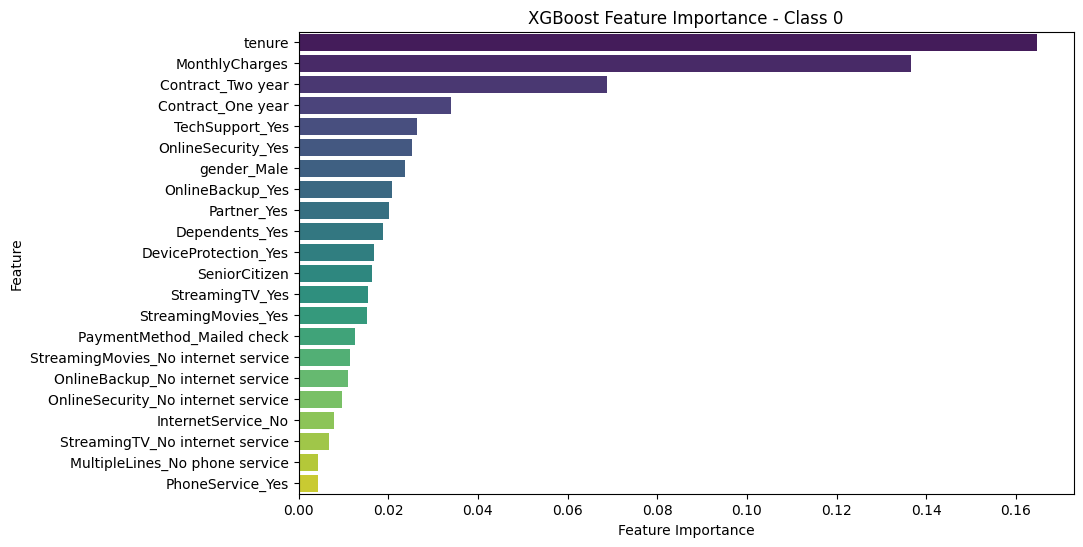

Confusion Matrix:
 [[684  92]
 [122 159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       776
           1       0.63      0.57      0.60       281

    accuracy                           0.80      1057
   macro avg       0.74      0.72      0.73      1057
weighted avg       0.79      0.80      0.79      1057



In [ ]:
# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Reset the index of importance_df
importance_df = importance_df.reset_index(drop=True)

# Separate feature importances for class 0 and class 1
class_0_importance_df = importance_df[y_val.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
class_1_importance_df = importance_df[y_val.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)

# Plot bar charts for feature importances of class 0 and class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 0')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 1')
plt.show()

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_val, y_val_pred))


In the code above, we performed hyperparameter tuning for the XGBoost model using GridSearchCV. The parameter grid param_grid defined different values to be tested for n_estimators, max_depth, and learning_rate. After running the grid search, we obtained the best hyperparameters (best_params) and used the corresponding best model to make predictions on the validation set. We calculated various evaluation metrics and printed them, along with the confusion matrix and classification report.

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create the XGBoost model
xgboost = xgb.XGBClassifier(scale_pos_weight=class_weights[1])

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])
confusion = confusion_matrix(y_val, y_val_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Get the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

importance_df


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Accuracy: 0.771996215704825
F1 Score: 0.6119162640901772
Precision: 0.5588235294117647
Recall: 0.6761565836298933
AUC: 0.8341779175991488


Feature  Importance
0                           SeniorCitizen    0.007168
1                                  tenure    0.027112
2                          MonthlyCharges    0.011070
3                            TotalCharges    0.013104
4                             gender_Male    0.006937
5                             Partner_Yes    0.004465
6                          Dependents_Yes    0.007874
7                        PhoneService_Yes    0.011114
8          MultipleLines_No phone service    0.000000
9                       MultipleLines_Yes    0.009216
10            InternetService_Fiber optic    0.143395
11                     InternetService_No    0.033855
12     OnlineSecurity_No internet service    0.000000
13                     OnlineSecurity_Yes    0.012069
14       OnlineBackup_No internet service    0.000000
15                       OnlineBackup_Yes    0.009384
16   DeviceProtection_No internet service    0.000000
17                   DeviceProtection_Yes    0.002759
18        TechSupport_No internet service    0.000000
19                        TechSupport_Yes    0.013754
20        StreamingTV_No internet service    0.000000
21                        StreamingTV_Yes    0.007721
22    StreamingMovies_No internet service    0.000000
23                    StreamingMovies_Yes    0.044627
24                      Contract_One year    0.293008
25                      Contract_Two year    0.289512
26                   PaperlessBilling_Yes    0.016123
27  PaymentMethod_Credit card (automatic)    0.010033
28         PaymentMethod_Electronic check    0.018125
29             PaymentMethod_Mailed check    0.007573

<ipython-input-47-6737ddfc2e8d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0_importance_df = importance_df[y_val.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
<ipython-input-47-6737ddfc2e8d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1_importance_df = importance_df[y_val.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)


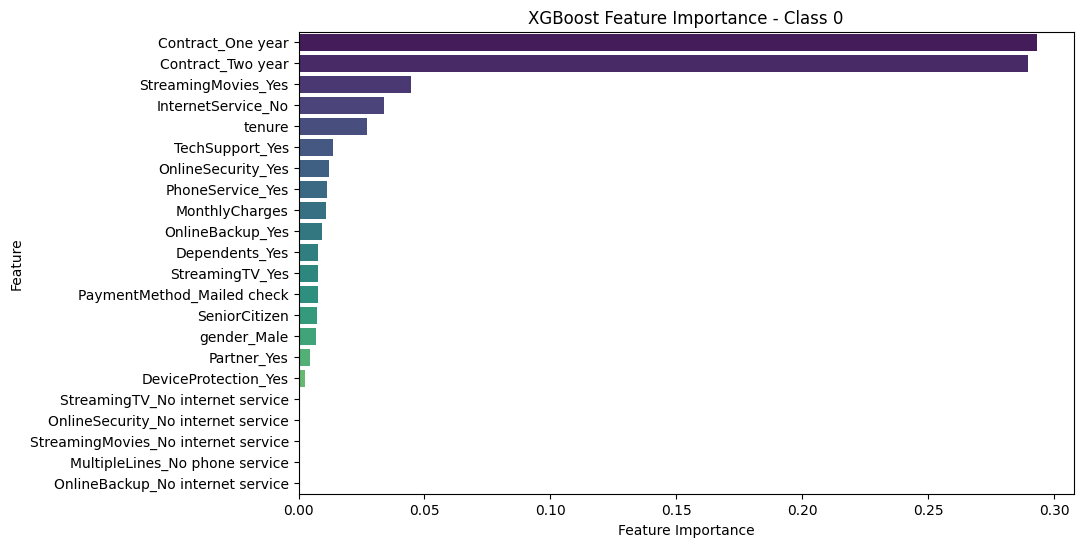

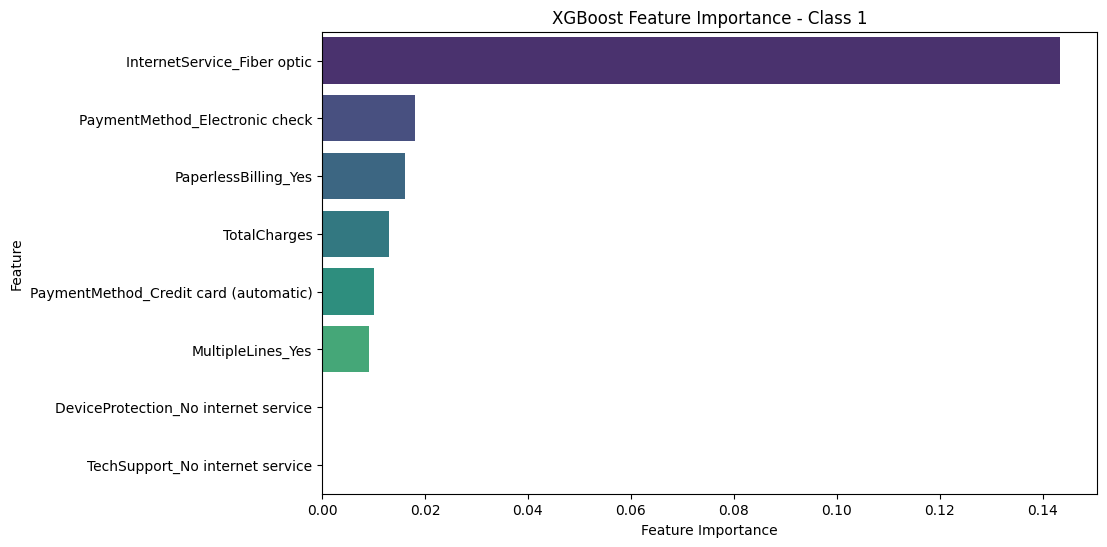

Confusion Matrix:
 [[626 150]
 [ 91 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       776
           1       0.56      0.68      0.61       281

    accuracy                           0.77      1057
   macro avg       0.72      0.74      0.73      1057
weighted avg       0.79      0.77      0.78      1057



In [ ]:
# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Reset the index of importance_df
importance_df = importance_df.reset_index(drop=True)

# Separate feature importances for class 0 and class 1
class_0_importance_df = importance_df[y_val.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
class_1_importance_df = importance_df[y_val.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)

# Plot bar charts for feature importances of class 0 and class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 0')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 1')
plt.show()

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_val, y_val_pred))


In [ ]:
# Separate the target variable
y = data['Churn']
X = data.drop('Churn', axis=1)

# One-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85            0   
1                 0      34           56.95       1889.50            1   
2                 0       2           53.85        108.15            1   
3                 0      45           42.30       1840.75            1   
4                 0       2           70.70        151.65            0   
...             ...     ...             ...           ...          ...   
7038              0      24           84.80       1990.50            1   
7039              0      72          103.20       7362.90            0   
7040              0      11           29.60        346.45            0   
7041              1       4           74.40        306.60            1   
7042              0      66          105.65       6844.50            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1               0               0                 1   
2               0               0                 1   
3               0               0                 0   
4               0               0                 1   
...           ...             ...               ...   
7038            1               1                 1   
7039            1               1                 1   
7040            1               1                 0   
7041            1               0                 1   
7042            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                                  1                  0  ...   
1                                  0                  0  ...   
2                                  0                  0  ...   
3                                  1                  0  ...   
4                                  0                  0  ...   
...                              ...                ...  ...   
7038                               0                  1  ...   
7039                               0                  1  ...   
7040                               1                  0  ...   
7041                               0                  1  ...   
7042                               0                  0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
0                                   0                0   
1                                   0                0   
2                                   0                0   
3                                   0                0   
4                                   0                0   
...                               ...              ...   
7038                                0                1   
7039                                0                1   
7040                                0                0   
7041                                0                0   
7042                                0                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   
4                                       0                    0   
...                                   ...                  ...   
7038                                    0                    1   
7039                                    0                    1   
7040                                    0                    0   
7041                                    0                    0   
7042                                    0                    1   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                     0                  0                     1   
1                     1                  0                   

In [ ]:
X_encoded_shape = X_encoded.shape
print(X_encoded_shape)

(7043, 30)


<ipython-input-52-ac6f2debb6a9>:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)


78/78 [==============================] - 0s 948us/step


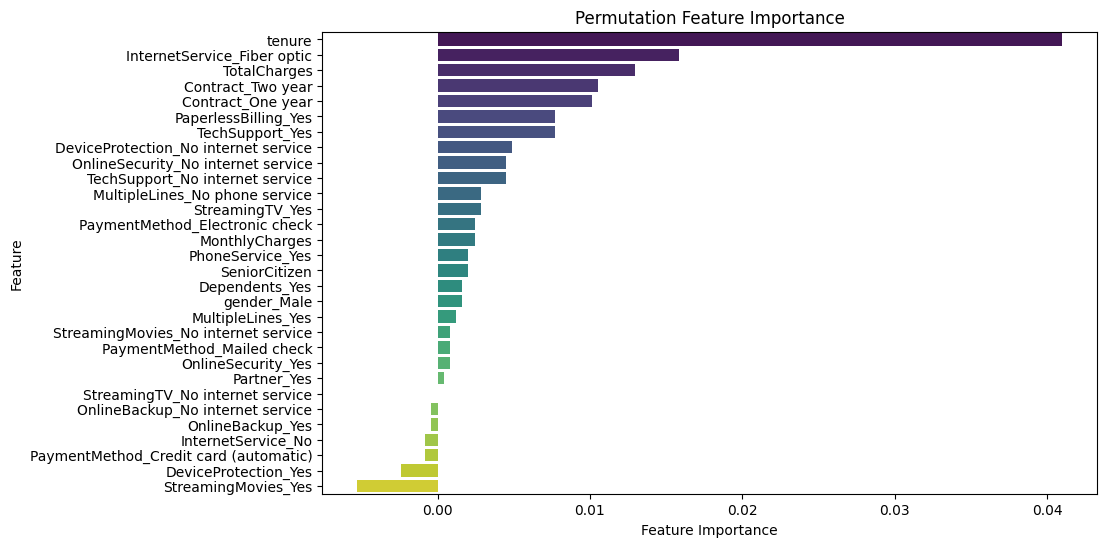

Feature Importances:
                                  Feature  Importance
1                                  tenure    0.040974
10            InternetService_Fiber optic    0.015822
3                            TotalCharges    0.012982
25                      Contract_Two year    0.010548
24                      Contract_One year    0.010142
26                   PaperlessBilling_Yes    0.007708
19                        TechSupport_Yes    0.007708
16   DeviceProtection_No internet service    0.004868
12     OnlineSecurity_No internet service    0.004462
18        TechSupport_No internet service    0.004462
8          MultipleLines_No phone service    0.002840
21                        StreamingTV_Yes    0.002840
28         PaymentMethod_Electronic check    0.002434
2                          MonthlyCharges    0.002434
7                        PhoneService_Yes    0.002028
0                           SeniorCitizen    0.002028
6                          Dependents_Yes    0.001623
4      

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train, validation, and test sets (70-15-15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the build_model function
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)

# Train the model
keras_classifier.fit(X_train_scaled, y_train, epochs=10, verbose=0)

# Calculate the baseline accuracy on the validation set
y_val_pred = keras_classifier.predict(X_val_scaled)
baseline_accuracy = accuracy_score(y_val, y_val_pred)

# Permutation feature importance
n_permutations = 100  # Number of permutations
feature_importances = []
for feature in range(X_val_scaled.shape[1]):
    X_val_permuted = X_val_scaled.copy()
    np.random.shuffle(X_val_permuted[:, feature])  # Shuffle values of the selected feature
    y_val_pred_permuted = keras_classifier.predict(X_val_permuted)
    accuracy_permuted = accuracy_score(y_val, y_val_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances.append(feature_importance)

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort the DataFrame in descending order based on the feature importances
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot a bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

# Print the feature importances
print("Feature Importances:")
print(importance_df)





<ipython-input-54-6ef777da4a60>:46: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


67/67 [==============================] - 0s 1ms/step
Best Hyperparameters: {'learning_rate': 0.1, 'hidden_units_2': 128, 'hidden_units_1': 256}
Accuracy: 0.7827733080927591
Precision: [0.87241379 0.586727  ]
Recall: [0.82196231 0.67770035]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1539
           1       0.59      0.68      0.63       574

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.79      0.78      0.79      2113

78/78 [==============================] - 0s 1ms/step


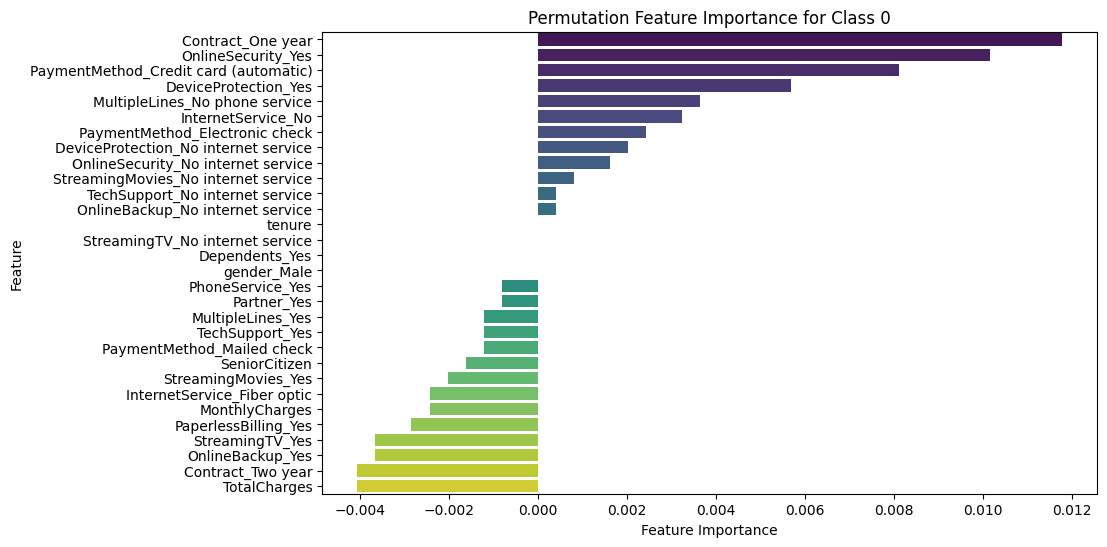

Feature Importances for Class 0:
                                  Feature  Class 0 Importance  \
24                      Contract_One year            0.011765   
13                     OnlineSecurity_Yes            0.010142   
27  PaymentMethod_Credit card (automatic)            0.008114   
17                   DeviceProtection_Yes            0.005680   
8          MultipleLines_No phone service            0.003651   
11                     InternetService_No            0.003245   
28         PaymentMethod_Electronic check            0.002434   
16   DeviceProtection_No internet service            0.002028   
12     OnlineSecurity_No internet service            0.001623   
22    StreamingMovies_No internet service            0.000811   
18        TechSupport_No internet service            0.000406   
14       OnlineBackup_No internet service            0.000406   
1                                  tenure            0.000000   
20        StreamingTV_No internet service            0.00

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.activations import relu, sigmoid
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train, validation, and test sets (70-15-15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define the build_model function
def build_model(hidden_units_1=128, hidden_units_2=64, learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units_1, activation=relu, input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(hidden_units_2, activation=relu))
    model.add(layers.Dense(1, activation=sigmoid))

    optimizer = Adam(learning_rate=learning_rate)
    loss = BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=[AUC()])

    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=build_model)

# Define the hyperparameter grid
param_grid = {
    'hidden_units_1': [64, 128, 256],
    'hidden_units_2': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(keras_classifier, param_grid, n_iter=40, cv=5, scoring='accuracy')
random_search.fit(X_train_scaled, y_train, sample_weight=sample_weights, validation_data=(X_val_scaled, y_val), verbose=0)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
classification_report = classification_report(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_report)

# Compute sample weights for the permutation feature importance calculation
sample_weights_permutation = compute_sample_weight(class_weight='balanced', y=y_val)

# Calculate the baseline accuracy on the validation set
y_val_pred = best_model.predict(X_val_scaled)
baseline_accuracy = accuracy_score(y_val, y_val_pred)

# Permutation feature importance for class 0
n_permutations = 100  # Number of permutations
feature_importances_class_0 = []
for feature in range(X_val_scaled.shape[1]):
    X_val_permuted = X_val_scaled.copy()
    np.random.shuffle(X_val_permuted[:, feature])  # Shuffle values of the selected feature
    y_val_pred_permuted = best_model.predict(X_val_permuted)
    accuracy_permuted = accuracy_score(y_val, y_val_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_0.append(feature_importance)

# Permutation feature importance for class 1
feature_importances_class_1 = []
for feature in range(X_val_scaled.shape[1]):
    X_val_permuted = X_val_scaled.copy()
    np.random.shuffle(X_val_permuted[:, feature])  # Shuffle values of the selected feature
    y_val_pred_permuted = best_model.predict(X_val_permuted)
    accuracy_permuted = accuracy_score(y_val, y_val_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_1.append(feature_importance)

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Class 0 Importance': feature_importances_class_0, 'Class 1 Importance': feature_importances_class_1})

# Sort the DataFrame in descending order based on the feature importances for class 0
class_0_importance_df = importance_df.sort_values('Class 0 Importance', ascending=False)

# Sort the DataFrame in descending order based on the feature importances for class 1
class_1_importance_df = importance_df.sort_values('Class 1 Importance', ascending=False)

# Plot a bar chart with different colors for each bar for class 0
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 0 Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 0')
plt.show()

# Plot a bar chart with different colors for each bar for class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 1 Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 1')
plt.show()

# Print the feature importances for class 0
print("Feature Importances for Class 0:")
print(class_0_importance_df)

# Print the feature importances for class 1
print("Feature Importances for Class 1:")
print(class_1_importance_df)


In [ ]:

confusion = confusion_matrix(y_test, y_test_pred)


print("AUC:", auc)






AUC: 0.721575279662571


ANN splitting 70 30  , 60 40   , 50 50

<ipython-input-62-6d10f0f092c3>:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


67/67 [==============================] - 0s 1ms/step
Best Hyperparameters: {'learning_rate': 0.1, 'hidden_units_2': 64, 'hidden_units_1': 64}
Accuracy: 0.7586370089919545
Precision: [0.89668466 0.53921569]
Recall: [0.75568551 0.76655052]
AUC: 0.7611180163597793
Confusion Matrix:
 [[1163  376]
 [ 134  440]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1539
           1       0.54      0.77      0.63       574

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113

67/67 [==============================] - 0s 1ms/step


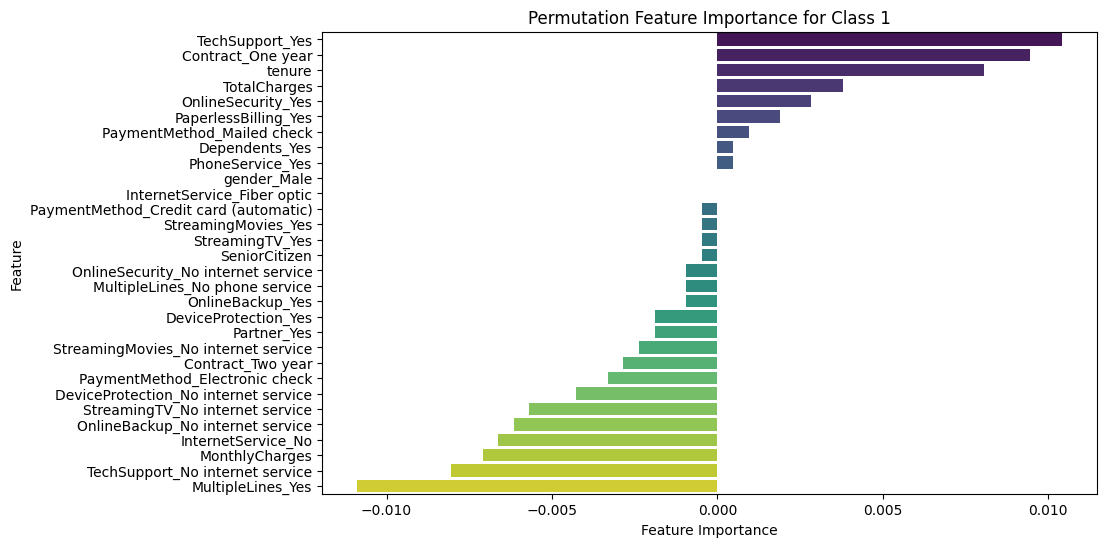

Feature Importances for Class 0:
                                  Feature  Class 0 Importance  \
3                            TotalCharges            0.012305   
1                                  tenure            0.010885   
24                      Contract_One year            0.009465   
19                        TechSupport_Yes            0.008519   
13                     OnlineSecurity_Yes            0.002840   
6                          Dependents_Yes            0.002366   
0                           SeniorCitizen            0.001420   
8          MultipleLines_No phone service            0.001420   
17                   DeviceProtection_Yes            0.000947   
4                             gender_Male            0.000473   
27  PaymentMethod_Credit card (automatic)           -0.000473   
15                       OnlineBackup_Yes           -0.000947   
23                    StreamingMovies_Yes           -0.001420   
29             PaymentMethod_Mailed check           -0.00

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.activations import relu, sigmoid
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define the build_model function
def build_model(hidden_units_1=128, hidden_units_2=64, learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units_1, activation=relu, input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(hidden_units_2, activation=relu))
    model.add(layers.Dense(1, activation=sigmoid))

    optimizer = Adam(learning_rate=learning_rate)
    loss = BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=[AUC()])

    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=build_model)

# Define the hyperparameter grid
param_grid = {
    'hidden_units_1': [64, 128, 256],
    'hidden_units_2': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(keras_classifier, param_grid, n_iter=40, cv=5, scoring='accuracy')
random_search.fit(X_train_scaled, y_train, sample_weight=sample_weights, verbose=0)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
classification_report = classification_report(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)

# Compute sample weights for the permutation feature importance calculation
sample_weights_permutation = compute_sample_weight(class_weight='balanced', y=y_train)

# Calculate the baseline accuracy on the test set
y_test_pred_baseline = best_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_test_pred_baseline)

# Permutation feature importance for class 0
n_permutations = 100  # Number of permutations
feature_importances_class_0 = []
for feature in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle values of the selected feature
    y_test_pred_permuted = best_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_test_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_0.append(feature_importance)

# Permutation feature importance for class 1
feature_importances_class_1 = []
for feature in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle values of the selected feature
    y_test_pred_permuted = best_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_test_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_1.append(feature_importance)

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Class 0 Importance': feature_importances_class_0, 'Class 1 Importance': feature_importances_class_1})

# Sort the DataFrame in descending order based on the feature importances for class 0
class_0_importance_df = importance_df.sort_values('Class 0 Importance', ascending=False)

# Sort the DataFrame in descending order based on the feature importances for class 1
class_1_importance_df = importance_df.sort_values('Class 1 Importance', ascending=False)

# Plot a bar chart with different colors for each bar for class 0
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 0 Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 0')
plt.show()

# Plot a bar chart with different colors for each bar for class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 1 Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 1')
plt.show()

# Print the feature importances for class 0
print("Feature Importances for Class 0:")
print(class_0_importance_df)

# Print the feature importances for class 1
print("Feature Importances for Class 1:")
print(class_1_importance_df)



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_encoded and y are defined earlier as your features and target variable

# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define the build_model function with the best parameters
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(64, activation=relu, input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(64, activation=relu))
    model.add(layers.Dense(1, activation=sigmoid))

    optimizer = Adam(learning_rate=0.1)
    loss = BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=[AUC(), 'accuracy']) # Added 'accuracy' here

    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=build_model)

# Fit the model with the training data and sample weights
keras_classifier.fit(X_train_scaled, y_train, sample_weight=sample_weights, verbose=0)

# Make predictions on the test set
y_test_pred = keras_classifier.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
classification_rep = classification_report(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Rest of the code for permutation feature importance and plotting remains the same


<ipython-input-63-fc64b45a5266>:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model)


67/67 [==============================] - 0s 850us/step
Accuracy: 0.7368670137245622
Precision: [0.9092423  0.50986842]
Recall: [0.70955166 0.81010453]
AUC: 0.7598280932684013
Confusion Matrix:
 [[1092  447]
 [ 109  465]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1539
           1       0.51      0.81      0.63       574

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



67/67 [==============================] - 0s 1ms/step - loss: 0.7803 - auc_1143: 0.8249 - accuracy: 0.7440


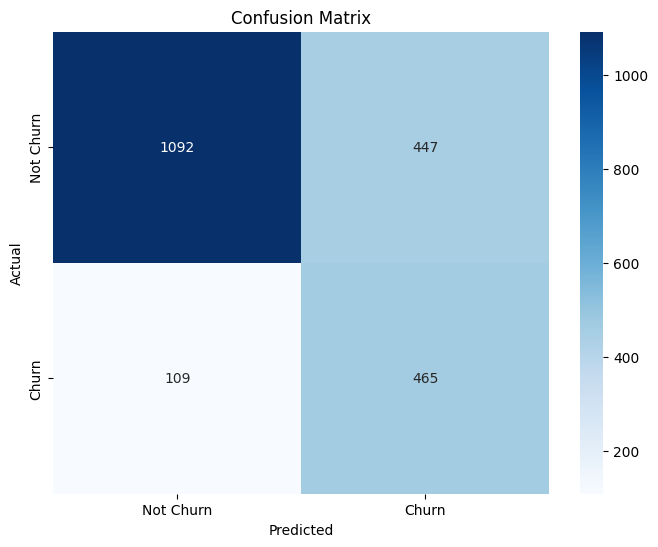

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve
import seaborn as sns

# Compute permutation feature importance
result = permutation_importance(keras_classifier, X_test_scaled, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Plot permutation feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(X_test_scaled.shape[1]), result.importances_mean[perm_sorted_idx])
plt.yticks(range(X_test_scaled.shape[1]), X_encoded.columns[perm_sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()

# Plot confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot AUC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_encoded and y are defined earlier as your features and target variable

# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define the build_model function with the best parameters
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(64, activation=relu, input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(64, activation=relu))
    model.add(layers.Dense(1, activation=sigmoid))

    optimizer = Adam(learning_rate=0.1)
    loss = BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=[AUC(), 'accuracy']) # Added 'accuracy' here

    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=build_model)

# Fit the model with the training data and sample weights
keras_classifier.fit(X_train_scaled, y_train, sample_weight=sample_weights, verbose=0)

# Make predictions on the test set
y_test_pred = keras_classifier.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
classification_rep = classification_report(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Rest of the code for permutation feature importance and plotting remains the same

<ipython-input-81-fc64b45a5266>:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model)


67/67 [==============================] - 0s 840us/step
Accuracy: 0.7638428774254614
Precision: [0.90185471 0.54578755]
Recall: [0.7582846  0.77874564]
AUC: 0.7685151224945833
Confusion Matrix:
 [[1167  372]
 [ 127  447]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1539
           1       0.55      0.78      0.64       574

    accuracy                           0.76      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.81      0.76      0.77      2113



67/67 [==============================] - 0s 1ms/step - loss: 0.5417 - auc_1151: 0.8258 - accuracy: 0.7681


<ipython-input-82-ce88048d84db>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')
<ipython-input-82-ce88048d84db>:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Importance')


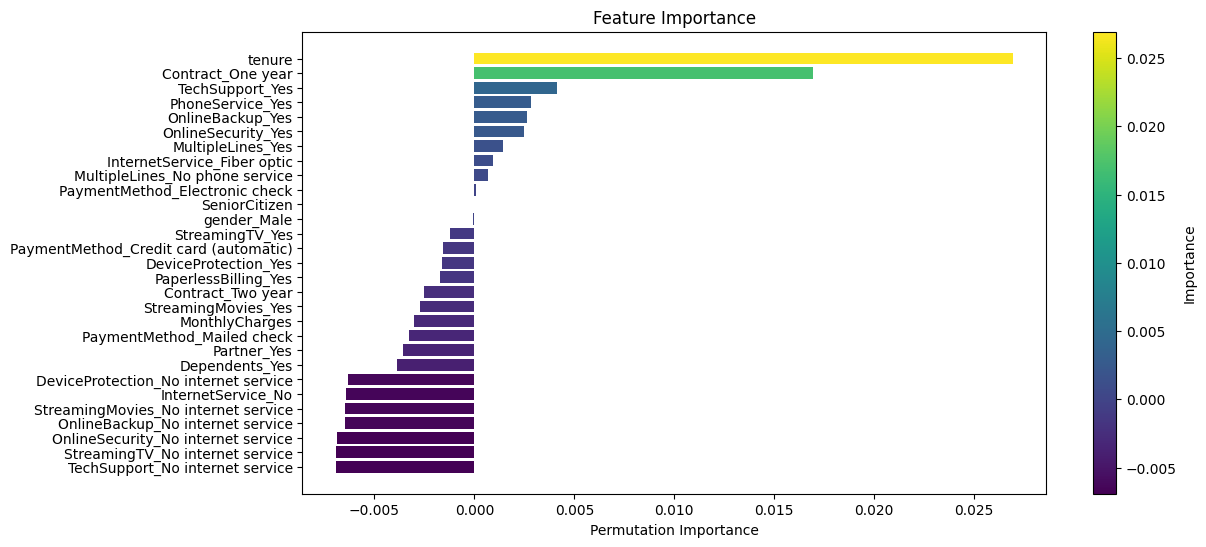

In [82]:
# Compute permutation feature importance
result = permutation_importance(keras_classifier, X_test_scaled, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Create a colormap
cmap = plt.cm.get_cmap('viridis')

# Normalize the importance values
norm = plt.Normalize(result.importances_mean[perm_sorted_idx].min(), result.importances_mean[perm_sorted_idx].max())

# Plot permutation feature importance with multi-colored bars
plt.figure(figsize=(12, 6))
for i, idx in enumerate(perm_sorted_idx):
    plt.barh(i, result.importances_mean[idx], color=cmap(norm(result.importances_mean[idx])))
plt.yticks(range(X_test_scaled.shape[1]), X_encoded.columns[perm_sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Importance')

plt.show()



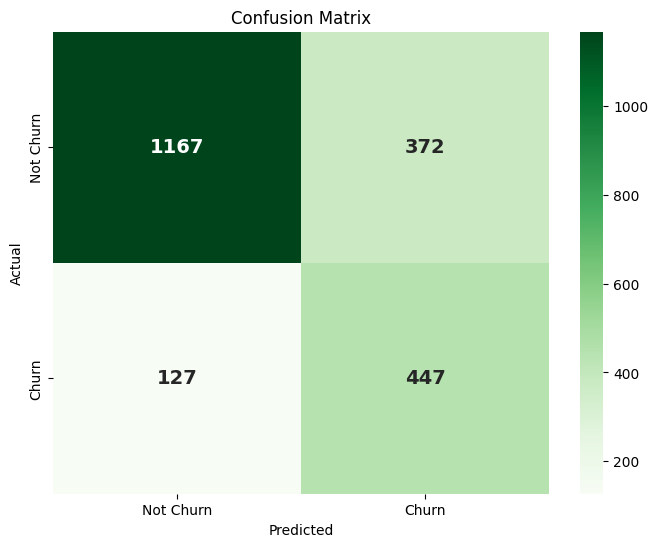

In [84]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'],
            annot_kws={'weight': 'bold', 'fontsize': 14}) # Bold and clear numbers
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [85]:
from sklearn.metrics import roc_curve
from matplotlib.collections import LineCollection

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)

# Create points and segments for the LineCollection
points = np.array([fpr, tpr]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalize the True Positive Rate for coloring
norm = plt.Normalize(tpr.min(), tpr.max())
cmap = plt.get_cmap('viridis')

# Create the LineCollection
lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=2)
lc.set_array(tpr)

# Create the plot
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.add_collection(lc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([lc], ['ROC curve (area = %0.2f)' % auc], loc='lower right')

# Set the background color to light blue
ax.set_facecolor('lightblue')

# Add


ValueError: ignored

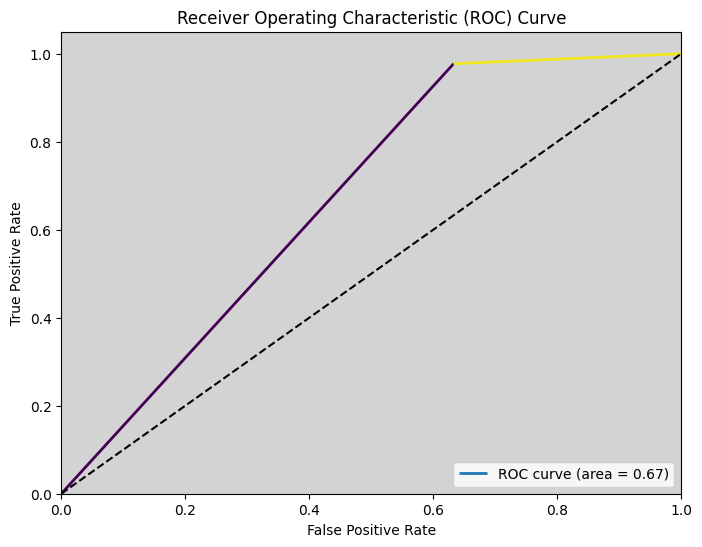

In [74]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.metrics import roc_curve

# Plot AUC curve with gradient color
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob) # Use probabilities, not binary predictions
points = np.array([fpr, tpr]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(tpr.min(), tpr.max())
cmap = plt.get_cmap('viridis')

lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=2)
lc.set_array(tpr)

plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.add_collection(lc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([lc], ['ROC curve (area = %0.2f)' % auc], loc='lower right')

# Change background color
ax.set_facecolor('lightgray')

# Add labels to the lines with values
for i in range(0, len(fpr), len(fpr)//10): # Adjust the step to control the number of labels
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=9, color='black')

plt.show()



In [69]:
# Plot confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='yellow', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


KeyError: ignored

<Figure size 800x600 with 0 Axes>

In [72]:
# Assign class weights to put more emphasis on the minority class
class_weights = {0: 1., 1: 5.} # You can adjust these weights based on your specific dataset

# Define a custom callback to adjust the decision threshold
class ThresholdCallback(keras.callbacks.Callback):
    def __init__(self, threshold):
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        self.model.threshold = self.threshold

threshold_callback = ThresholdCallback(threshold=0.3) # You can adjust this threshold

# Fit the model with class weights and custom callback
keras_classifier.fit(X_train_scaled, y_train, class_weight=class_weights, callbacks=[threshold_callback, early_stopping], verbose=0)

# Adjust predictions based on custom threshold
y_test_pred_prob = keras_classifier.predict(X_test_scaled)
y_test_pred = (y_test_pred_prob > keras_classifier.model.threshold).astype(int)


67/67 [==============================] - 0s 2ms/step


In [73]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
classification_rep = classification_report(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix (you can use the code provided earlier)


Accuracy: 0.5328916232844297
Precision: [0.97750865 0.36547231]
Recall: [0.36712151 0.97735192]
AUC: 0.6722367119243455
Confusion Matrix:
 [[565 974]
 [ 13 561]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.37      0.53      1539
           1       0.37      0.98      0.53       574

    accuracy                           0.53      2113
   macro avg       0.67      0.67      0.53      2113
weighted avg       0.81      0.53      0.53      2113



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.activations import relu, sigmoid
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define the build_model function
def build_model(hidden_units_1=128, hidden_units_2=64, learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units_1, activation=relu, input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(hidden_units_2, activation=relu))
    model.add(layers.Dense(1, activation=sigmoid))

    optimizer = Adam(learning_rate=learning_rate)
    loss = BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=[AUC()])

    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=build_model)

# Define the hyperparameter grid
param_grid = {
    'hidden_units_1': [64, 128, 256],
    'hidden_units_2': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(keras_classifier, param_grid, n_iter=40, cv=5, scoring='accuracy')
random_search.fit(X_train_scaled, y_train, sample_weight=sample_weights, verbose=0)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
classification_report = classification_report(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)

# Compute sample weights for the permutation feature importance calculation
sample_weights_permutation = compute_sample_weight(class_weight='balanced', y=y_train)

# Calculate the baseline accuracy on the test set
y_test_pred_baseline = best_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_test_pred_baseline)

# Permutation feature importance for class 0
n_permutations = 100  # Number of permutations
feature_importances_class_0 = []
for feature in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle values of the selected feature
    y_test_pred_permuted = best_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_test_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_0.append(feature_importance)

# Permutation feature importance for class 1
feature_importances_class_1 = []
for feature in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle values of the selected feature
    y_test_pred_permuted = best_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_test_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_1.append(feature_importance)

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Class 0 Importance': feature_importances_class_0, 'Class 1 Importance': feature_importances_class_1})

# Sort the DataFrame in descending order based on the feature importances for class 0
class_0_importance_df = importance_df.sort_values('Class 0 Importance', ascending=False)

# Sort the DataFrame in descending order based on the feature importances for class 1
class_1_importance_df = importance_df.sort_values('Class 1 Importance', ascending=False)

# Plot a bar chart with different colors for each bar for class 0
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 0 Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 0')
plt.show()

# Plot a bar chart with different colors for each bar for class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 1 Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 1')
plt.show()

# Print the feature importances for class 0
print("Feature Importances for Class 0:")
print(class_0_importance_df)

# Print the feature importances for class 1
print("Feature Importances for Class 1:")
print(class_1_importance_df)

<ipython-input-25-e5395e01fd5b>:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


31/31 [==============================] - 0s 1ms/step


KeyboardInterrupt: ignored

<ipython-input-63-9c962921b95e>:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


89/89 [==============================] - 0s 884us/step
Best Hyperparameters: {'learning_rate': 0.1, 'hidden_units_2': 128, 'hidden_units_1': 128}
Accuracy: 0.7789212207239177
Precision: [0.87813808 0.56953642]
Recall: [0.81150314 0.68891856]
AUC: 0.7502108498458715
Confusion Matrix:
 [[1679  390]
 [ 233  516]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      2069
           1       0.57      0.69      0.62       749

    accuracy                           0.78      2818
   macro avg       0.72      0.75      0.73      2818
weighted avg       0.80      0.78      0.79      2818

89/89 [==============================] - 0s 999us/step


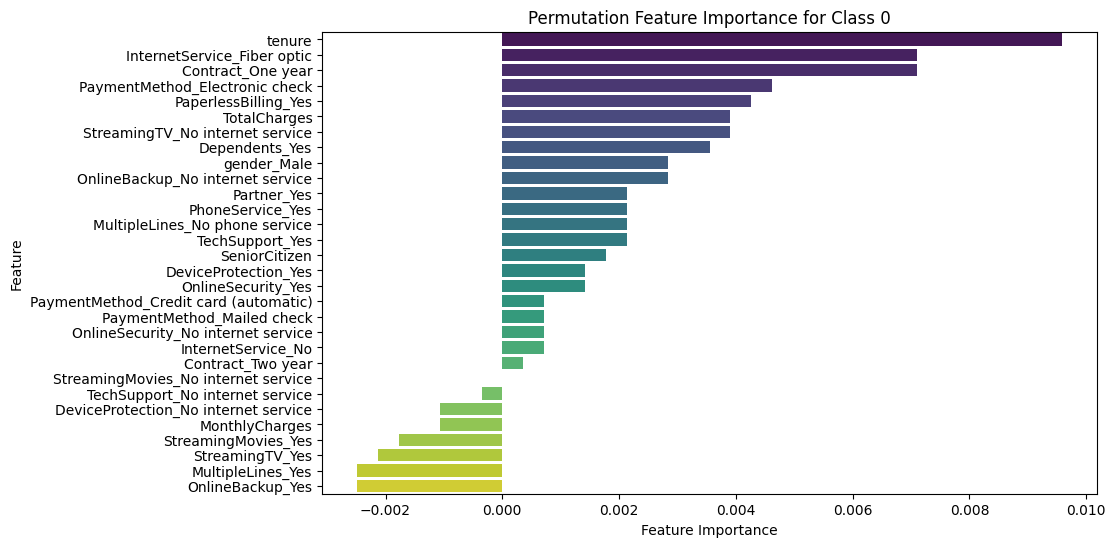

Feature Importances for Class 0:
                                  Feature  Class 0 Importance  \
1                                  tenure            0.009581   
10            InternetService_Fiber optic            0.007097   
24                      Contract_One year            0.007097   
28         PaymentMethod_Electronic check            0.004613   
26                   PaperlessBilling_Yes            0.004258   
3                            TotalCharges            0.003903   
20        StreamingTV_No internet service            0.003903   
6                          Dependents_Yes            0.003549   
4                             gender_Male            0.002839   
14       OnlineBackup_No internet service            0.002839   
5                             Partner_Yes            0.002129   
7                        PhoneService_Yes            0.002129   
8          MultipleLines_No phone service            0.002129   
19                        TechSupport_Yes            0.00

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.activations import relu, sigmoid
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets (60-40 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define the build_model function
def build_model(hidden_units_1=128, hidden_units_2=64, learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units_1, activation=relu, input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(hidden_units_2, activation=relu))
    model.add(layers.Dense(1, activation=sigmoid))

    optimizer = Adam(learning_rate=learning_rate)
    loss = BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=[AUC()])

    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=build_model)

# Define the hyperparameter grid
param_grid = {
    'hidden_units_1': [64, 128, 256],
    'hidden_units_2': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(keras_classifier, param_grid, n_iter=40, cv=5, scoring='accuracy')
random_search.fit(X_train_scaled, y_train, sample_weight=sample_weights, verbose=0)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
classification_report = classification_report(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)

# Compute sample weights for the permutation feature importance calculation
sample_weights_permutation = compute_sample_weight(class_weight='balanced', y=y_train)

# Calculate the baseline accuracy on the test set
y_test_pred_baseline = best_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_test_pred_baseline)

# Permutation feature importance for class 0
n_permutations = 100  # Number of permutations
feature_importances_class_0 = []
for feature in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle values of the selected feature
    y_test_pred_permuted = best_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_test_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_0.append(feature_importance)

# Permutation feature importance for class 1
feature_importances_class_1 = []
for feature in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle values of the selected feature
    y_test_pred_permuted = best_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_test_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_1.append(feature_importance)

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Class 0 Importance': feature_importances_class_0, 'Class 1 Importance': feature_importances_class_1})

# Sort the DataFrame in descending order based on the feature importances for class 0
class_0_importance_df = importance_df.sort_values('Class 0 Importance', ascending=False)

# Sort the DataFrame in descending order based on the feature importances for class 1
class_1_importance_df = importance_df.sort_values('Class 1 Importance', ascending=False)

# Plot a bar chart with different colors for each bar for class 0
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 0 Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 0')
plt.show()

# Plot a bar chart with different colors for each bar for class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 1 Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 1')
plt.show()

# Print the feature importances for class 0
print("Feature Importances for Class 0:")
print(class_0_importance_df)

# Print the feature importances for class 1
print("Feature Importances for Class 1:")
print(class_1_importance_df)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

def build_model(hidden_units_1=128, hidden_units_2=64, learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units_1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(hidden_units_2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    loss = BinaryCrossentropy()
    model.compile(optimizer=optimizer, loss=loss, metrics=[AUC()])
    return model

keras_classifier = KerasClassifier(build_fn=build_model)

param_grid = {
    'hidden_units_1': [29,32,64,84, 128, 256],
    'hidden_units_2': [29,32, 64,84,128, 256],
    'learning_rate': [0.001, 0.01, 0.1]
}

random_search = RandomizedSearchCV(keras_classifier, param_grid, n_iter=40, cv=5, scoring='accuracy')
random_search.fit(X_train_scaled, y_train, sample_weight=sample_weights, verbose=0)

best_model = random_search.best_estimator_
best_params = random_search.best_params_

y_test_pred = best_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
class_report = classification_report(y_test, y_test_pred) # Renamed variable
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", class_report)

# Further code for permutation importance and visualization goes here...



<ipython-input-18-88b1c7e11b70>:38: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model)


67/67 [==============================] - 0s 977us/step
Best Hyperparameters: {'learning_rate': 0.1, 'hidden_units_2': 84, 'hidden_units_1': 84}
Accuracy: 0.7841930903928065
Precision: [0.87578071 0.58779762]
Recall: [0.820013   0.68815331]
AUC: 0.7540831527780609
Confusion Matrix:
 [[1262  277]
 [ 179  395]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1539
           1       0.59      0.69      0.63       574

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.80      0.78      0.79      2113



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.activations import relu, sigmoid
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets (50-50 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define the build_model function
def build_model(hidden_units_1=128, hidden_units_2=64, learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units_1, activation=relu, input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(hidden_units_2, activation=relu))
    model.add(layers.Dense(1, activation=sigmoid))

    optimizer = Adam(learning_rate=learning_rate)
    loss = BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=[AUC()])

    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=build_model)

# Define the hyperparameter grid
param_grid = {
    'hidden_units_1': [64, 128, 256],
    'hidden_units_2': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(keras_classifier, param_grid, n_iter=40, cv=5, scoring='accuracy')
random_search.fit(X_train_scaled, y_train, sample_weight=sample_weights, verbose=0)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
classification_report = classification_report(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics and classification report
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report)

# Compute sample weights for the permutation feature importance calculation
sample_weights_permutation = compute_sample_weight(class_weight='balanced', y=y_train)

# Calculate the baseline accuracy on the test set
y_test_pred_baseline = best_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_test_pred_baseline)

# Permutation feature importance for class 0
n_permutations = 100  # Number of permutations
feature_importances_class_0 = []
for feature in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle values of the selected feature
    y_test_pred_permuted = best_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_test_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_0.append(feature_importance)

# Permutation feature importance for class 1
feature_importances_class_1 = []
for feature in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle values of the selected feature
    y_test_pred_permuted = best_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_test_pred_permuted)
    feature_importance = baseline_accuracy - accuracy_permuted
    feature_importances_class_1.append(feature_importance)

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Class 0 Importance': feature_importances_class_0, 'Class 1 Importance': feature_importances_class_1})

# Sort the DataFrame in descending order based on the feature importances for class 0
class_0_importance_df = importance_df.sort_values('Class 0 Importance', ascending=False)

# Sort the DataFrame in descending order based on the feature importances for class 1
class_1_importance_df = importance_df.sort_values('Class 1 Importance', ascending=False)

# Plot a bar chart with different colors for each bar for class 0
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 0 Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 0')
plt.show()

# Plot a bar chart with different colors for each bar for class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Class 1 Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for Class 1')
plt.show()

# Print the feature importances for class 0
print("Feature Importances for Class 0:")
print(class_0_importance_df)

# Print the feature importances for class 1
print("Feature Importances for Class 1:")
print(class_1_importance_df)

<ipython-input-64-bffe82843f9f>:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


67/67 [==============================] - 0s 1ms/step
Best Hyperparameters: {'learning_rate': 0.1, 'hidden_units_2': 32, 'hidden_units_1': 64}
Accuracy: 0.7856128726928537
Precision: [0.83895131 0.6183953 ]
Recall: [0.87329435 0.55052265]
AUC: 0.7119084975310905
Confusion Matrix:
 [[1344  195]
 [ 258  316]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1539
           1       0.62      0.55      0.58       574

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113

67/67 [==============================] - 0s 1ms/step


Feature Importances for Class 0:
                                  Feature  Class 0 Importance  \
24                      Contract_One year            0.011358   
10            InternetService_Fiber optic            0.008992   
25                      Contract_Two year            0.005679   
26                   PaperlessBilling_Yes            0.002366   
1                                  tenure            0.002366   
15                       OnlineBackup_Yes            0.001420   
20        StreamingTV_No internet service            0.000947   
19                        TechSupport_Yes            0.000947   
13                     OnlineSecurity_Yes            0.000473   
29             PaymentMethod_Mailed check            0.000473   
0                           SeniorCitizen            0.000000   
28         PaymentMethod_Electronic check            0.000000   
3                            TotalCharges            0.000000   
16   DeviceProtection_No internet service            0.00

RF splitting 70 30 , 60 40 , 50 50

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy: 0.7927117841930904
F1 Score: 0.5852272727272727
Precision: 0.6410788381742739
Recall: 0.5383275261324042
AUC: 0.847304009798661


<ipython-input-65-3452239069f4>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
<ipython-input-65-3452239069f4>:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)


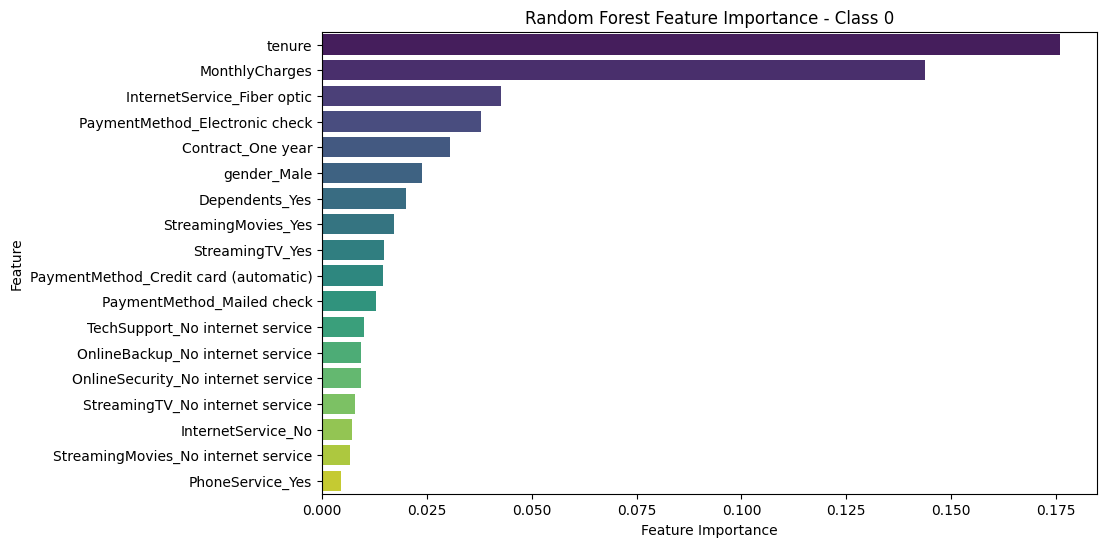

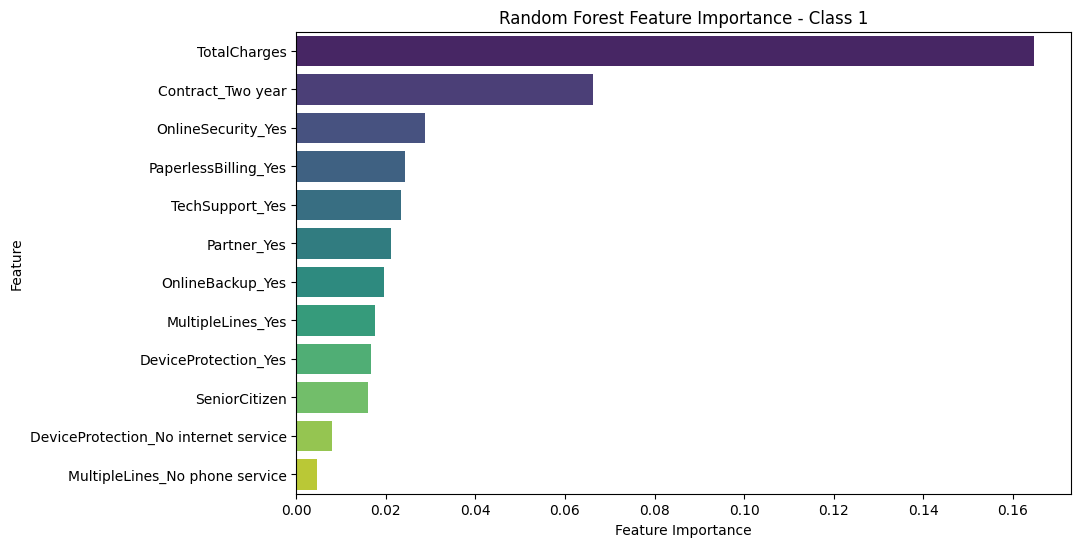

Confusion Matrix:
 [[1366  173]
 [ 265  309]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1539
           1       0.64      0.54      0.59       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
rf = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_test_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Get the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Reset the index of importance_df
importance_df = importance_df.reset_index(drop=True)

# Separate feature importances for class 0 and class 1
class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)

# Plot bar charts for feature importances of class 0 and class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance - Class 0')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance - Class 1')
plt.show()

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.801277501774308
F1 Score: 0.6116504854368933
Precision: 0.6363636363636364
Recall: 0.5887850467289719
AUC: 0.8487585509533897


<ipython-input-66-ee8a79974ff8>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
<ipython-input-66-ee8a79974ff8>:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)


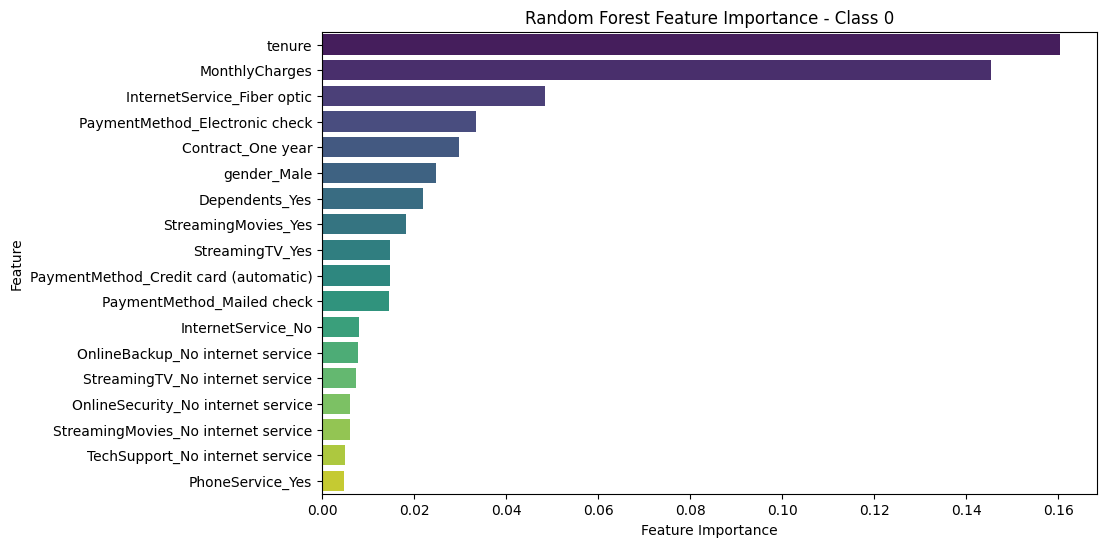

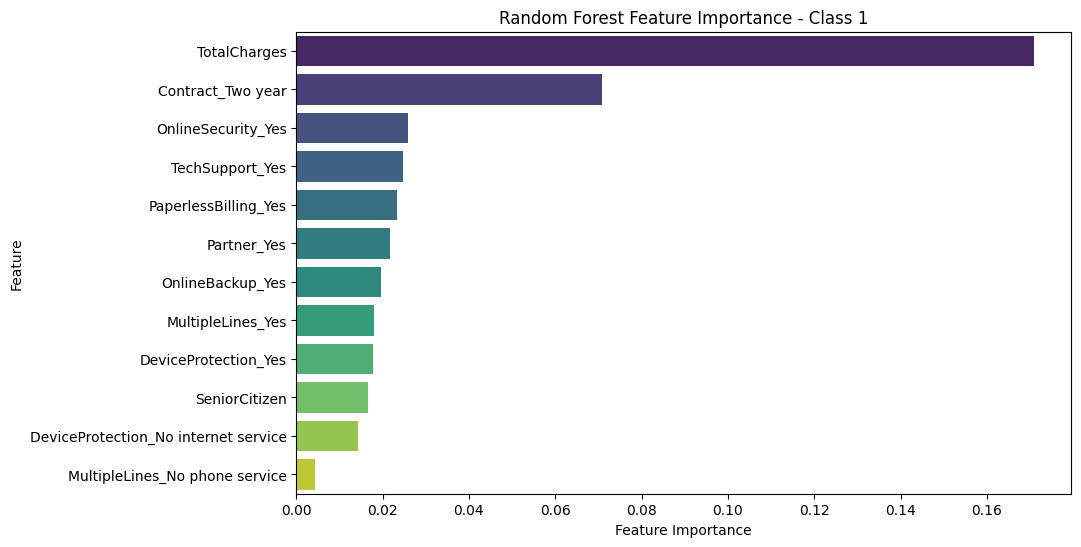

Confusion Matrix:
 [[1817  252]
 [ 308  441]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      2069
           1       0.64      0.59      0.61       749

    accuracy                           0.80      2818
   macro avg       0.75      0.73      0.74      2818
weighted avg       0.80      0.80      0.80      2818



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

# Split the data into train and test sets (60-40 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
rf = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_test_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Get the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Reset the index of importance_df
importance_df = importance_df.reset_index(drop=True)

# Separate feature importances for class 0 and class 1
class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)

# Plot bar charts for feature importances of class 0 and class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance - Class 0')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance - Class 1')
plt.show()

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.7964224872231687
F1 Score: 0.5905197030268418
Precision: 0.6422360248447205
Recall: 0.5465116279069767
AUC: 0.8449024907094927


<ipython-input-67-d8d495803edc>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
<ipython-input-67-d8d495803edc>:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)


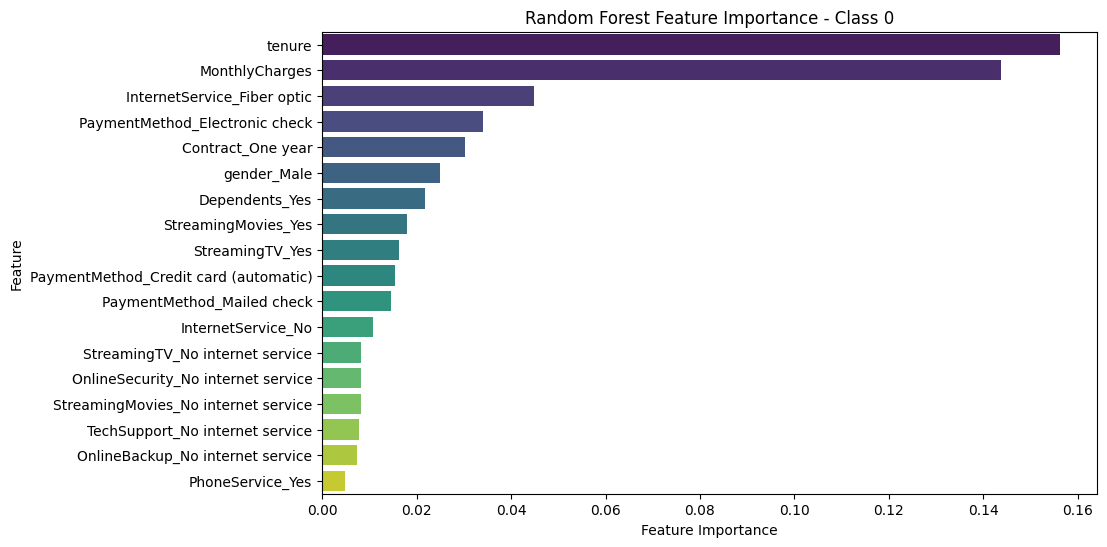

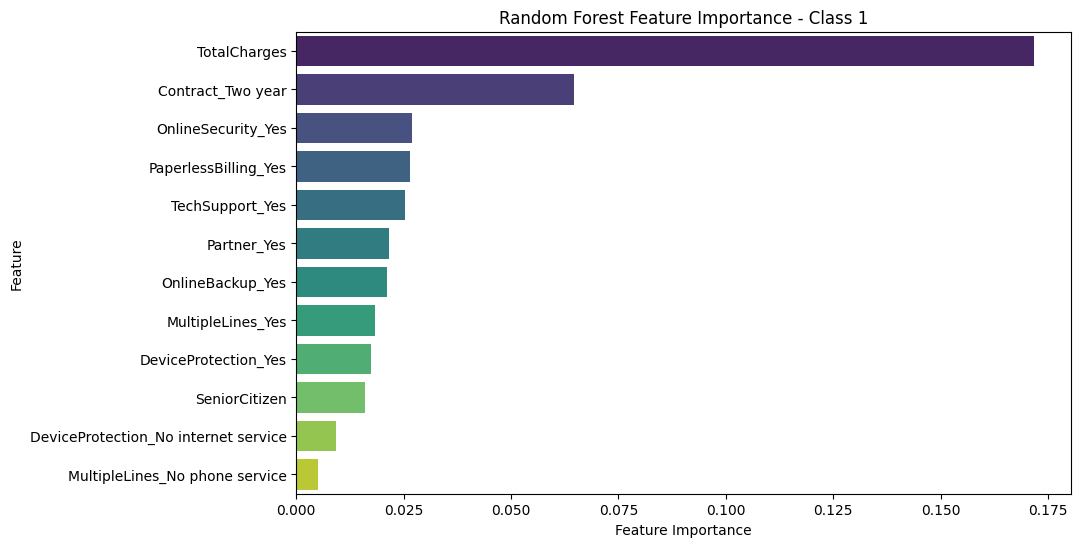

Confusion Matrix:
 [[2288  288]
 [ 429  517]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      2576
           1       0.64      0.55      0.59       946

    accuracy                           0.80      3522
   macro avg       0.74      0.72      0.73      3522
weighted avg       0.79      0.80      0.79      3522



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

# Split the data into train and test sets (50-50 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.5, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
rf = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_test_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Get the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Reset the index of importance_df
importance_df = importance_df.reset_index(drop=True)

# Separate feature importances for class 0 and class 1
class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)

# Plot bar charts for feature importances of class 0 and class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance - Class 0')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance - Class 1')
plt.show()

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


XGBOOST 70 30, 60 40,  50,50 splitting

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.792238523426408
F1 Score: 0.6445344129554657
Precision: 0.6021180030257186
Recall: 0.6933797909407665
AUC: 0.8479509523583122


<ipython-input-68-0a40cb50fb3c>:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
<ipython-input-68-0a40cb50fb3c>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)


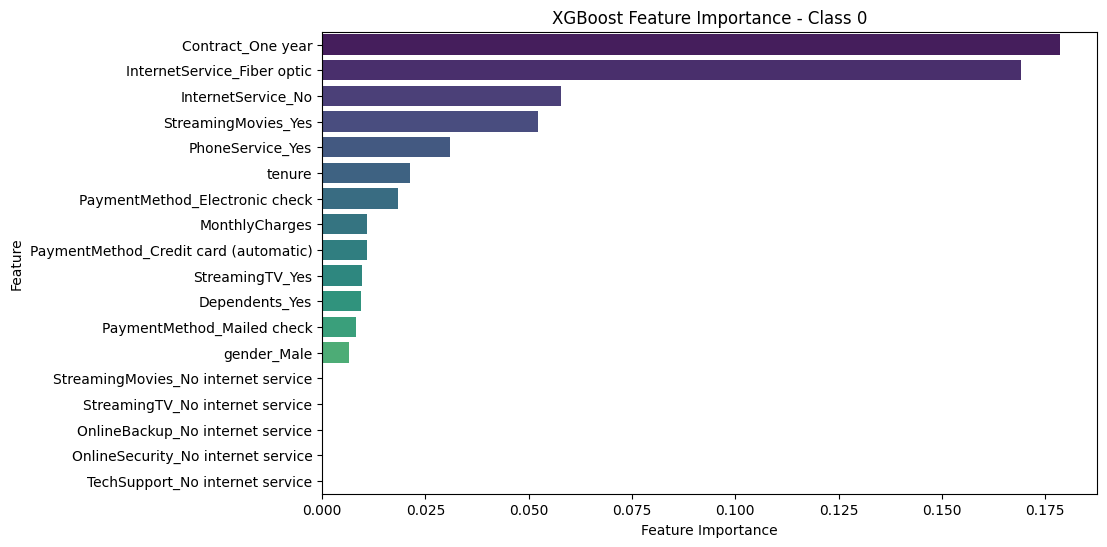

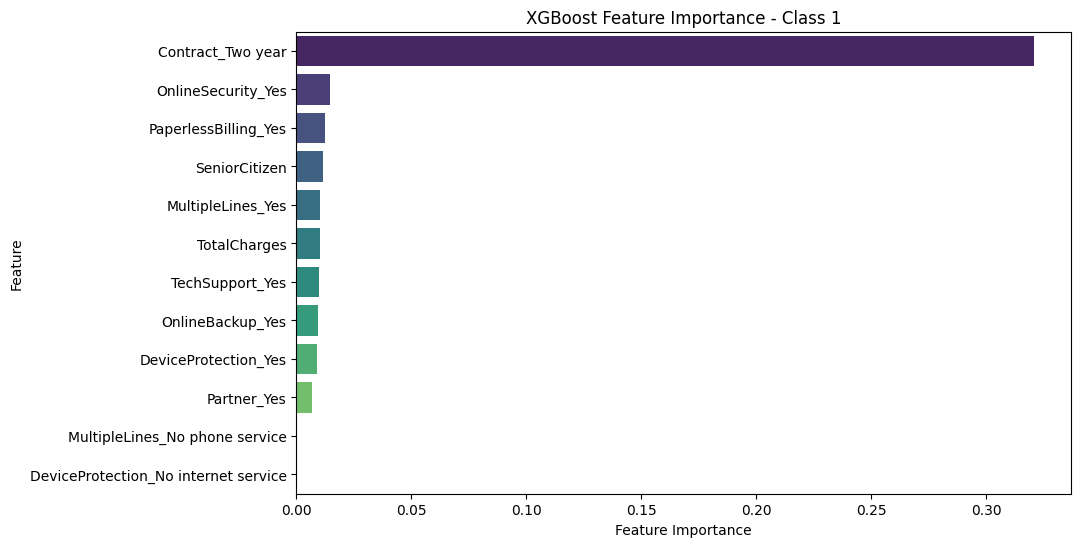

Confusion Matrix:
 [[1276  263]
 [ 176  398]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1539
           1       0.60      0.69      0.64       574

    accuracy                           0.79      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.80      0.79      0.80      2113



In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

# Split the data into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create the XGBoost model
xgboost = xgb.XGBClassifier(scale_pos_weight=class_weights[1])

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_test_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Get the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Reset the index of importance_df
importance_df = importance_df.reset_index(drop=True)

# Separate feature importances for class 0 and class 1
class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)

# Plot bar charts for feature importances of class 0 and class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 0')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 1')
plt.show()

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

# Split the data into train and test sets (60-40 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create the XGBoost model
xgboost = xgb.XGBClassifier(scale_pos_weight=class_weights[1])

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_test_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Get the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Reset the index of importance_df
importance_df = importance_df.reset_index(drop=True)

# Separate feature importances for class 0 and class 1
class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)

# Plot bar charts for feature importances of class 0 and class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 0')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 1')
plt.show()

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Accuracy: 0.7799858055358411
F1 Score: 0.6269554753309265
Precision: 0.5706462212486308
Recall: 0.6955941255006676
AUC: 0.8510761246992125


<ipython-input-69-04f52a05aa60>:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
<ipython-input-69-04f52a05aa60>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)


Confusion Matrix:
 [[1677  392]
 [ 228  521]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      2069
           1       0.57      0.70      0.63       749

    accuracy                           0.78      2818
   macro avg       0.73      0.75      0.74      2818
weighted avg       0.80      0.78      0.79      2818



In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

# Split the data into train and test sets (50-50 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.5, random_state=42)

# Compute class weights for imbalanced data
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create the XGBoost model
xgboost = xgb.XGBClassifier(scale_pos_weight=class_weights[1])

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_test_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Get the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store the feature importances and their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Reset the index of importance_df
importance_df = importance_df.reset_index(drop=True)

# Separate feature importances for class 0 and class 1
class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)

# Plot bar charts for feature importances of class 0 and class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_0_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 0')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=class_1_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance - Class 1')
plt.show()

# Print the evaluation metrics and classification report
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.7822260079500284
F1 Score: 0.5874125874125874
Precision: 0.5980284775465499
Recall: 0.5771670190274841
AUC: 0.8230503066195685


<ipython-input-70-81fa75146c77>:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0_importance_df = importance_df[y_test.reset_index(drop=True) == 0].sort_values('Importance', ascending=False)
<ipython-input-70-81fa75146c77>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1_importance_df = importance_df[y_test.reset_index(drop=True) == 1].sort_values('Importance', ascending=False)


Confusion Matrix:
 [[2209  367]
 [ 400  546]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2576
           1       0.60      0.58      0.59       946

    accuracy                           0.78      3522
   macro avg       0.72      0.72      0.72      3522
weighted avg       0.78      0.78      0.78      3522

